1. Analyse Exploratoire des Données

In [265]:
"""
ANALYSE EXPLORATOIRE DES DONNEES (EDA)
Projet: Prediction du risque d'infarctus
Dataset: dataset_infarctus.xlsx
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Creation de la structure de dossiers pour sauvegarder les resultats
output_dir = Path("analyse_exploratoire")
output_dir.mkdir(exist_ok=True)

# Creer les sous-dossiers pour chaque partie de l'EDA
dir_stats_desc = output_dir / "1_statistiques_descriptives"
dir_variable_cible = output_dir / "2_analyse_variable_cible"
dir_non_supervise = output_dir / "3_methodes_non_supervisees"

dir_stats_desc.mkdir(exist_ok=True)
dir_variable_cible.mkdir(exist_ok=True)
dir_non_supervise.mkdir(exist_ok=True)

print("=" * 80)
print("ANALYSE EXPLORATOIRE DES DONNEES - PREDICTION RISQUE INFARCTUS")
print("=" * 80)
print("\nStructure de dossiers creee:")
print(f"  - {dir_stats_desc}")
print(f"  - {dir_variable_cible}")
print(f"  - {dir_non_supervise}")


ANALYSE EXPLORATOIRE DES DONNEES - PREDICTION RISQUE INFARCTUS

Structure de dossiers creee:
  - analyse_exploratoire\1_statistiques_descriptives
  - analyse_exploratoire\2_analyse_variable_cible
  - analyse_exploratoire\3_methodes_non_supervisees


In [266]:
"""
1. CHARGEMENT ET EXPLORATION INITIALE DES DONNEES
"""
print("\n" + "=" * 80)
print("1. CHARGEMENT ET EXPLORATION INITIALE")
print("=" * 80)

# Charger le dataset
df = pd.read_excel('data/dataset_infarctus.xlsx')

print(f"\nDimensions du dataset: {df.shape[0]} patients x {df.shape[1]} variables")
print(f"\nVariables disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

# Apercu des premieres lignes
print(f"\nApercu des donnees:")
print(df.head(10))

# Types de donnees
print(f"\nTypes de variables:")
print(df.dtypes)

# Informations generales
print(f"\nInformations sur le dataset:")
print(df.info())



1. CHARGEMENT ET EXPLORATION INITIALE

Dimensions du dataset: 1000 patients x 21 variables

Variables disponibles:
    1. age
    2. sexe
    3. imc
    4. hypertension
    5. diabete
    6. hypercholesterolemie
    7. antecedents_familiaux
    8. tabagisme
    9. sedentarite
   10. pression_systolique
   11. pression_diastolique
   12. frequence_cardiaque
   13. douleur_thoracique
   14. dyspnee
   15. cholesterol_total
   16. ldl
   17. hdl
   18. triglycerides
   19. glycemie
   20. crp
   21. infarctus

Apercu des donnees:
          age  sexe        imc  hypertension  diabete  hypercholesterolemie  \
0   59.967142     1  25.763164             1        0                     0   
1   53.617357     1  23.991374             1        0                     1   
2   61.476885     0  28.276698             1        1                     0   
3   70.230299     0  32.361802             1        1                     0   
4   52.658466     1  19.499310             1        0                  

In [267]:
"""
2. STATISTIQUES DESCRIPTIVES
"""
print("\n" + "=" * 80)
print("2. STATISTIQUES DESCRIPTIVES")
print("=" * 80)

# Statistiques descriptives completes
print("\nStatistiques descriptives:")
stats_desc = df.describe(include='all')
print(stats_desc)

# Sauvegarder les statistiques
stats_desc.to_excel(dir_stats_desc / 'statistiques_descriptives.xlsx')
print(f"\nStatistiques sauvegardees dans: {dir_stats_desc / 'statistiques_descriptives.xlsx'}")



2. STATISTIQUES DESCRIPTIVES

Statistiques descriptives:
               age         sexe          imc  hypertension      diabete  \
count  1000.000000  1000.000000  1000.000000   1000.000000  1000.000000   
mean     55.321451     0.542000    27.071506      0.619000     0.468000   
std      11.668314     0.498482     3.841259      0.485876     0.499225   
min       2.000000     0.000000    18.000000      0.000000     0.000000   
25%      48.491180     0.000000    24.429312      0.000000     0.000000   
50%      55.227570     1.000000    27.027726      1.000000     0.000000   
75%      61.479439     1.000000    29.664085      1.000000     1.000000   
max     252.586304     1.000000    39.550994      1.000000     1.000000   

       hypercholesterolemie  antecedents_familiaux    tabagisme  sedentarite  \
count           1000.000000            1000.000000  1000.000000  1000.000000   
mean               0.402000               0.272000     0.701000     0.494000   
std                0.49054

In [268]:
"""
3. ANALYSE DES VALEURS MANQUANTES
"""
print("\n" + "=" * 80)
print("3. ANALYSE DES VALEURS MANQUANTES")
print("=" * 80)

# Verifier les valeurs manquantes
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Variable': missing.index,
    'Valeurs_Manquantes': missing.values,
    'Pourcentage': missing_pct.values
})

print("\nValeurs manquantes par variable:")
print(missing_df[missing_df['Valeurs_Manquantes'] > 0])

if missing.sum() == 0:
    print("\nAucune valeur manquante detectee dans le dataset")
else:
    # Visualisation des valeurs manquantes
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_vars = missing_df[missing_df['Valeurs_Manquantes'] > 0]
    if len(missing_vars) > 0:
        ax.bar(missing_vars['Variable'], missing_vars['Pourcentage'], color='coral')
        ax.set_xlabel('Variables')
        ax.set_ylabel('Pourcentage de valeurs manquantes (%)')
        ax.set_title('Analyse des Valeurs Manquantes')
        ax.tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.savefig(dir_stats_desc / 'valeurs_manquantes.png', dpi=300, bbox_inches='tight')
        plt.show()



3. ANALYSE DES VALEURS MANQUANTES

Valeurs manquantes par variable:
Empty DataFrame
Columns: [Variable, Valeurs_Manquantes, Pourcentage]
Index: []

Aucune valeur manquante detectee dans le dataset


In [269]:
"""
4. IDENTIFICATION DES TYPES DE VARIABLES
"""
print("\n" + "=" * 80)
print("4. IDENTIFICATION DES TYPES DE VARIABLES")
print("=" * 80)

def identifier_types_variables(dataframe):
    """Identifie les variables binaires, catégorielles et numériques"""
    variables_binaires = []
    variables_categorielles = []
    variables_numeriques = []

    for col in dataframe.columns:
        if col == 'infarctus':  # Exclure la variable cible
            continue

        valeurs_uniques = dataframe[col].dropna().unique()

        # Variables binaires (0 et 1)
        if len(valeurs_uniques) == 2 and set(valeurs_uniques).issubset({0, 1, 0.0, 1.0}):
            variables_binaires.append(col)
        # Variables catégorielles (type object ou nombre limité de valeurs uniques)
        elif dataframe[col].dtype == 'object' or (len(valeurs_uniques) < 10 and dataframe[col].dtype in ['int64', 'float64']):
            variables_categorielles.append(col)
        # Variables numeriques continues
        elif dataframe[col].dtype in ['int64', 'float64', 'int32', 'float32']:
            variables_numeriques.append(col)

    return variables_binaires, variables_categorielles, variables_numeriques

variables_binaires, variables_categorielles, variables_numeriques = identifier_types_variables(df)

print(f"\nVariables binaires ({len(variables_binaires)}):")
for i, var in enumerate(variables_binaires, 1):
    count = df[var].value_counts()
    print(f"   {i:2d}. {var:30s} - 0: {count.get(0, 0):4d}, 1: {count.get(1, 0):4d}")

print(f"\nVariables categorielles ({len(variables_categorielles)}):")
for i, var in enumerate(variables_categorielles, 1):
    valeurs_uniques = sorted(df[var].dropna().unique())
    count = df[var].value_counts().sort_index()
    print(f"   {i:2d}. {var:30s} - Valeurs: {valeurs_uniques}")
    for val in valeurs_uniques:
        print(f"       Valeur {val}: {count.get(val, 0):4d} patients")

print(f"\nVariables numeriques continues ({len(variables_numeriques)}):")
for i, var in enumerate(variables_numeriques, 1):
    min_val = df[var].min()
    max_val = df[var].max()
    mean_val = df[var].mean()
    print(f"   {i:2d}. {var:30s} - Min: {min_val:8.2f}, Max: {max_val:8.2f}, Moyenne: {mean_val:8.2f}")

# Separer les features de la variable cible
if 'infarctus' in df.columns:
    X = df.drop(columns=['infarctus'])
    y = df['infarctus']
else:
    X = df.copy()
    y = None



4. IDENTIFICATION DES TYPES DE VARIABLES

Variables binaires (8):
    1. sexe                           - 0:  458, 1:  542
    2. hypertension                   - 0:  381, 1:  619
    3. diabete                        - 0:  532, 1:  468
    4. hypercholesterolemie           - 0:  598, 1:  402
    5. antecedents_familiaux          - 0:  728, 1:  272
    6. sedentarite                    - 0:  506, 1:  494
    7. douleur_thoracique             - 0:  651, 1:  349
    8. dyspnee                        - 0:  733, 1:  267

Variables categorielles (1):
    1. tabagisme                      - Valeurs: [np.int64(0), np.int64(1), np.int64(2)]
       Valeur 0:  525 patients
       Valeur 1:  249 patients
       Valeur 2:  226 patients

Variables numeriques continues (11):
    1. age                            - Min:     2.00, Max:   252.59, Moyenne:    55.32
    2. imc                            - Min:    18.00, Max:    39.55, Moyenne:    27.07
    3. pression_systolique            - Min:    93.


5. VISUALISATION DES DISTRIBUTIONS - VARIABLES BINAIRES


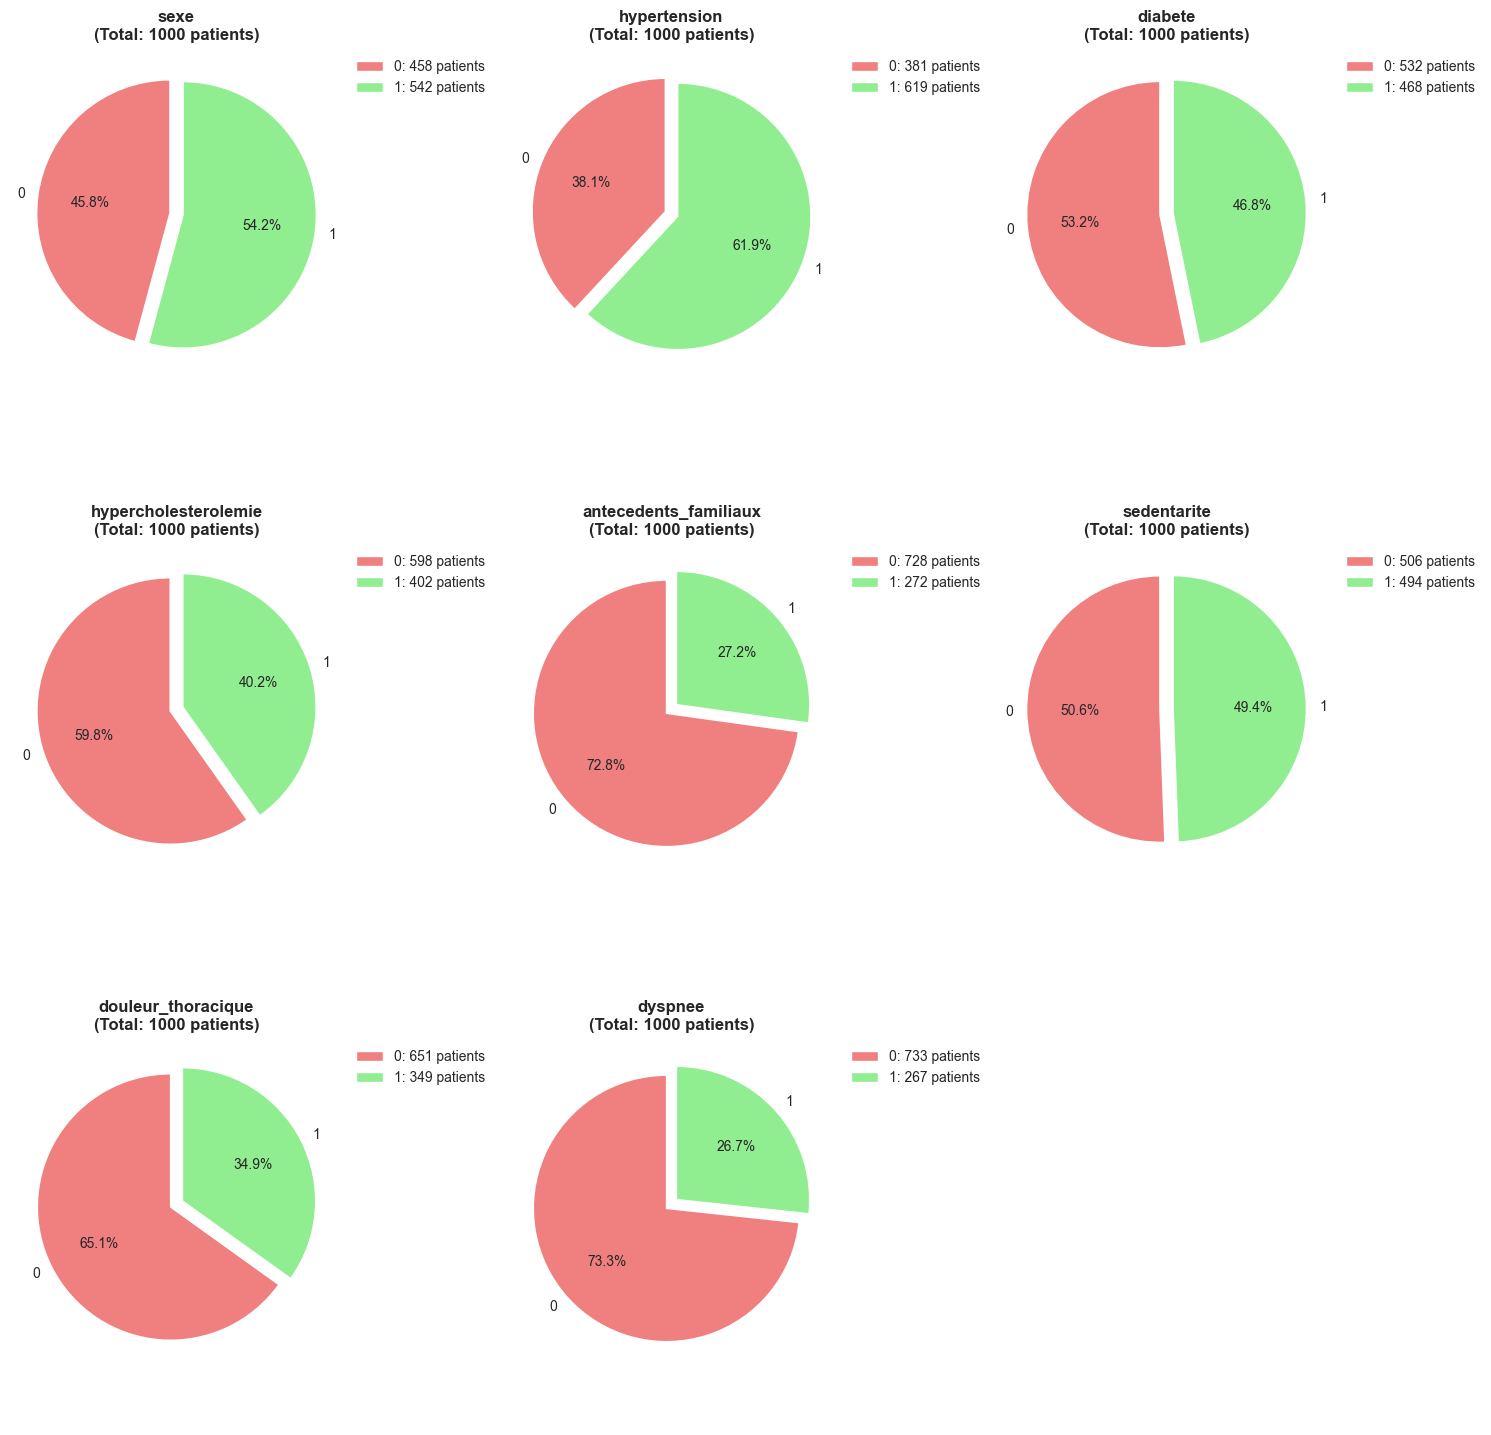

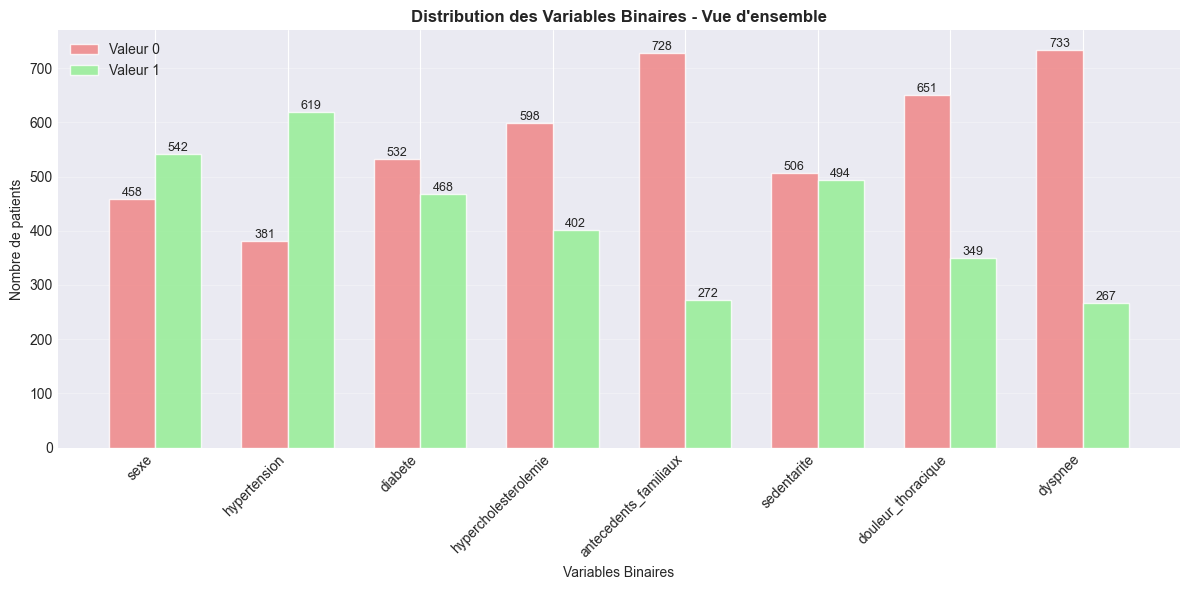

In [270]:
"""
5. VISUALISATION DES DISTRIBUTIONS - VARIABLES BINAIRES
"""
print("\n" + "=" * 80)
print("5. VISUALISATION DES DISTRIBUTIONS - VARIABLES BINAIRES")
print("=" * 80)

if len(variables_binaires) > 0:
    n_vars_bin = len(variables_binaires)

    # Graphiques en camembert pour les variables binaires
    n_cols_bin = min(3, n_vars_bin)
    n_rows_bin = (n_vars_bin + n_cols_bin - 1) // n_cols_bin

    fig, axes = plt.subplots(n_rows_bin, n_cols_bin, figsize=(5 * n_cols_bin, 5 * n_rows_bin))

    # S'assurer que axes est toujours une liste
    if n_vars_bin == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for idx, var in enumerate(variables_binaires):
        count = df[var].value_counts().sort_index()

        # Graphique en camembert
        colors_pie = ['lightcoral', 'lightgreen']
        axes[idx].pie(count.values, labels=['0', '1'], autopct='%1.1f%%',
                     colors=colors_pie, startangle=90, explode=(0.05, 0.05))
        axes[idx].set_title(f'{var}\n(Total: {count.sum()} patients)', fontweight='bold')

        # Ajouter les effectifs dans la legende
        legend_labels = [f'0: {count.get(0, 0)} patients', f'1: {count.get(1, 0)} patients']
        axes[idx].legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

    # Masquer les axes vides
    for idx in range(n_vars_bin, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig(dir_stats_desc / 'distributions_variables_binaires.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Visualisation alternative: Graphiques en barres groupees
    if len(variables_binaires) > 1:
        fig, ax = plt.subplots(figsize=(12, 6))

        # Preparer les donnees pour le graphique groupe
        data_for_plot = []
        labels = []
        for var in variables_binaires:
            count = df[var].value_counts().sort_index()
            data_for_plot.append([count.get(0, 0), count.get(1, 0)])
            labels.append(var)

        data_array = np.array(data_for_plot)
        x = np.arange(len(labels))
        width = 0.35

        bars1 = ax.bar(x - width/2, data_array[:, 0], width, label='Valeur 0', color='lightcoral', alpha=0.8)
        bars2 = ax.bar(x + width/2, data_array[:, 1], width, label='Valeur 1', color='lightgreen', alpha=0.8)

        ax.set_xlabel('Variables Binaires')
        ax.set_ylabel('Nombre de patients')
        ax.set_title('Distribution des Variables Binaires - Vue d\'ensemble', fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45, ha='right')
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')

        # Ajouter les valeurs sur les barres
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}',
                       ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.savefig(dir_stats_desc / 'distributions_variables_binaires_ensemble.png', dpi=300, bbox_inches='tight')
        plt.show()

else:
    print("\nAucune variable binaire detectee")



6. VISUALISATION DES DISTRIBUTIONS - VARIABLES NUMERIQUES


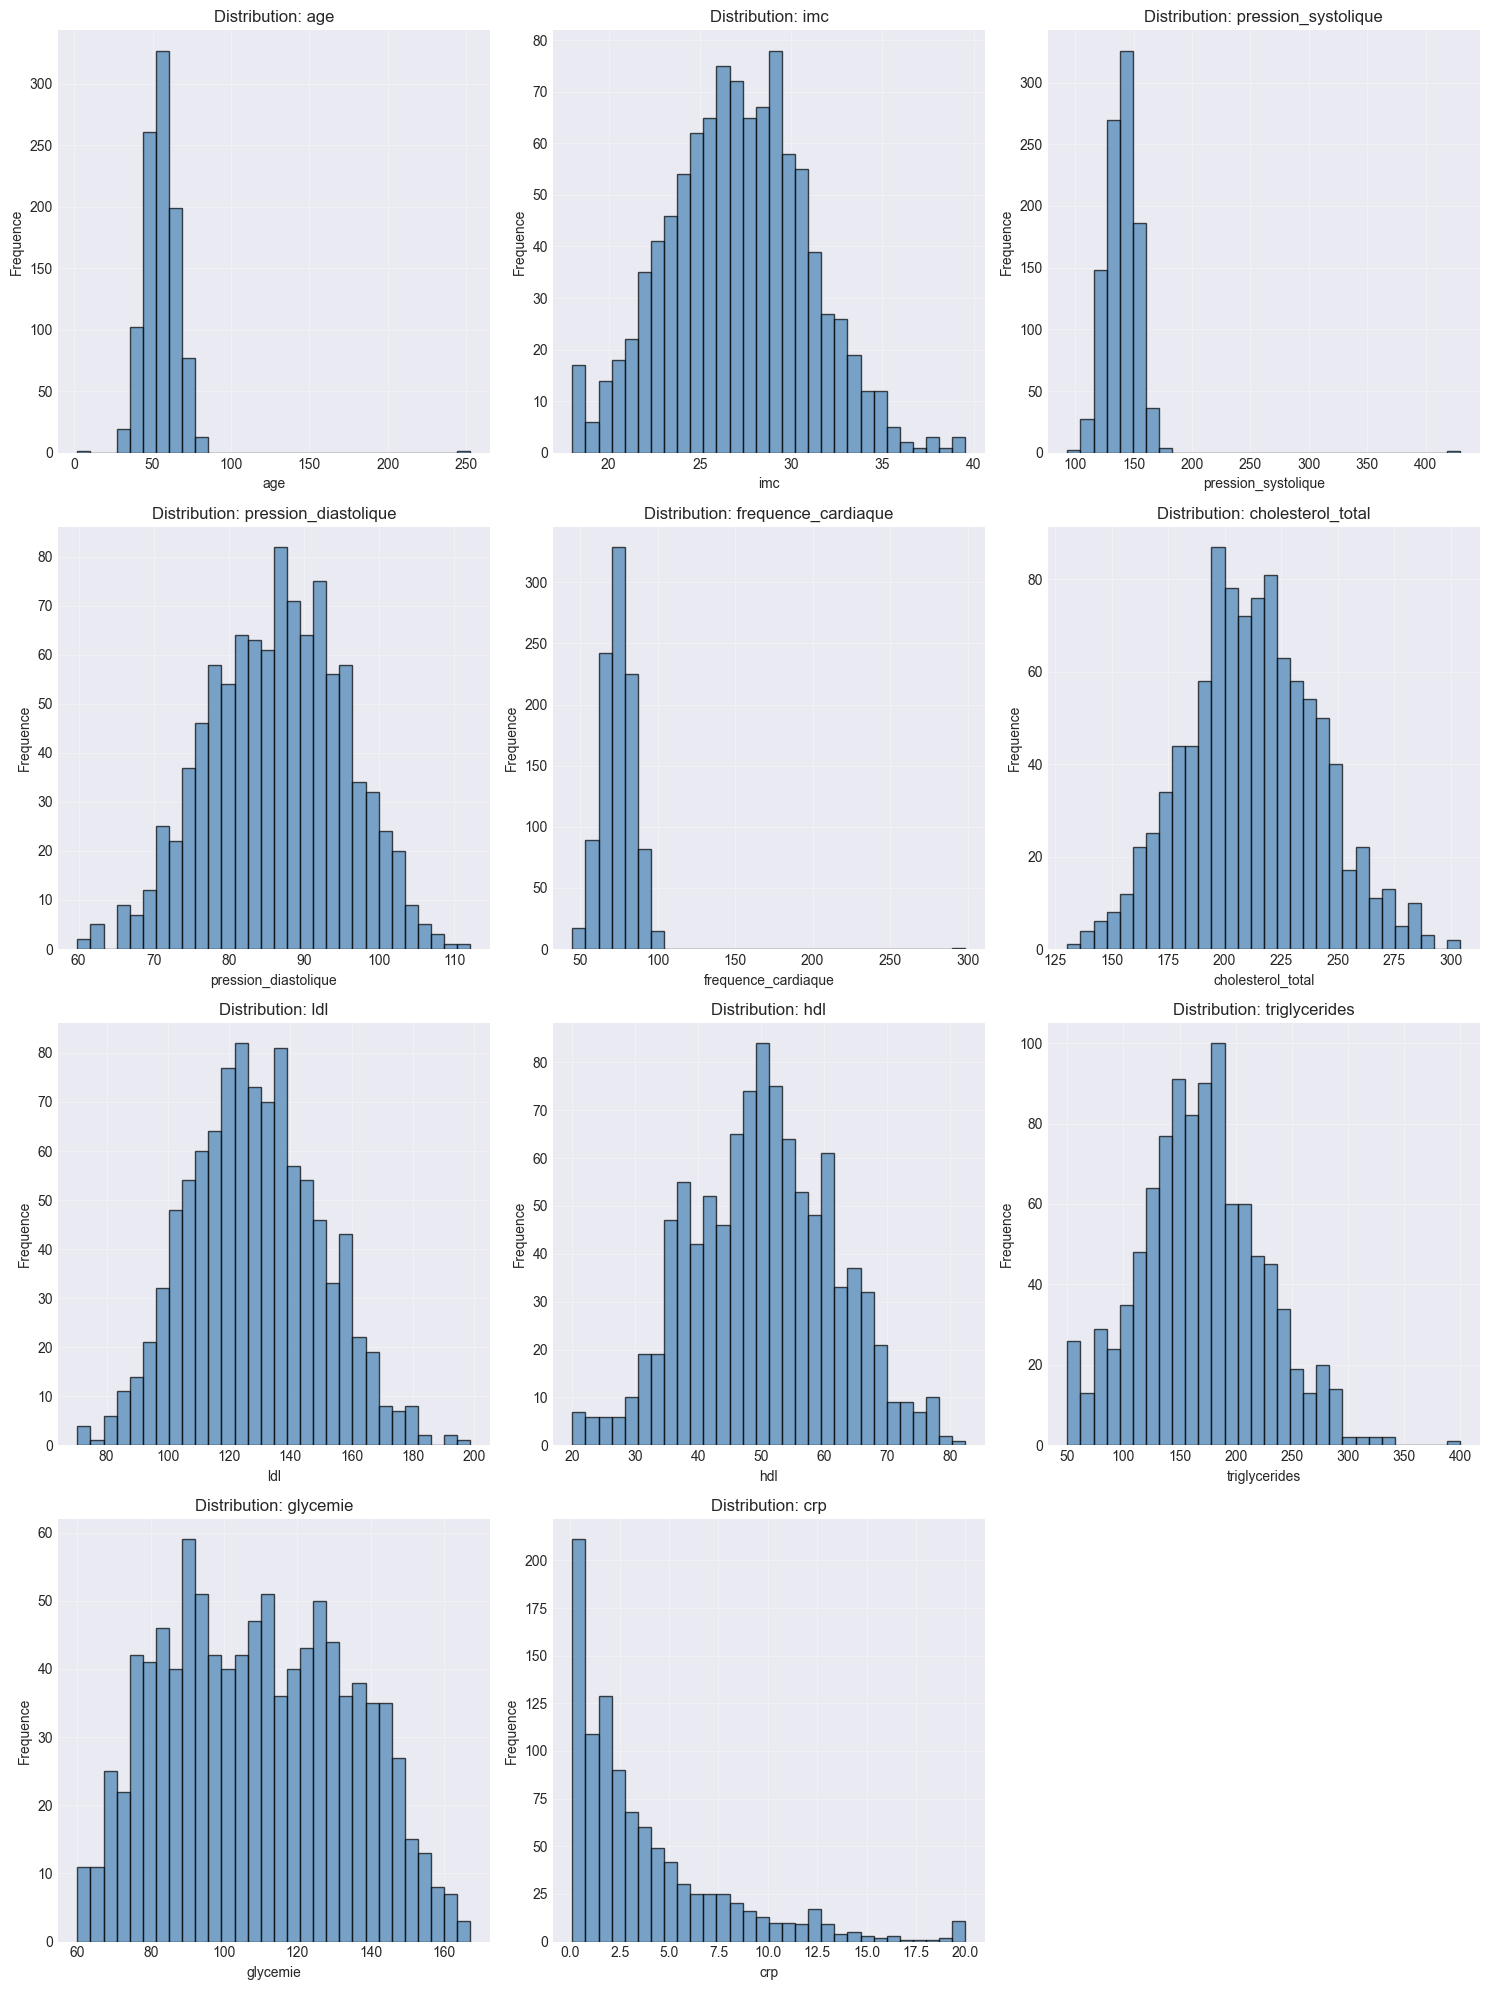

In [271]:
"""
6. VISUALISATION DES DISTRIBUTIONS - VARIABLES NUMERIQUES
"""
print("\n" + "=" * 80)
print("6. VISUALISATION DES DISTRIBUTIONS - VARIABLES NUMERIQUES")
print("=" * 80)

# Histogrammes des variables numeriques
n_vars = len(variables_numeriques)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_vars > 1 else [axes]

for idx, var in enumerate(variables_numeriques):
    axes[idx].hist(df[var].dropna(), bins=30, color='steelblue', alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequence')
    axes[idx].set_title(f'Distribution: {var}')
    axes[idx].grid(True, alpha=0.3)

# Masquer les axes vides
for idx in range(n_vars, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig(dir_stats_desc / 'distributions_variables_numeriques.png', dpi=300, bbox_inches='tight')
plt.show()



7. VISUALISATION DES DISTRIBUTIONS - VARIABLES CATEGORIELLES


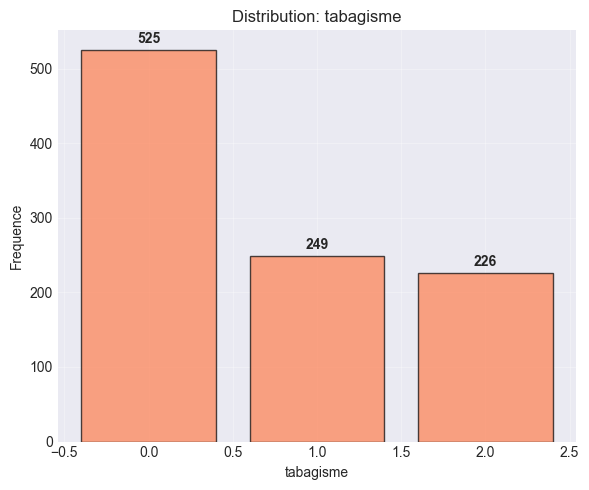

In [272]:
"""
7. VISUALISATION DES DISTRIBUTIONS - VARIABLES CATEGORIELLES
"""
print("\n" + "=" * 80)
print("7. VISUALISATION DES DISTRIBUTIONS - VARIABLES CATEGORIELLES")
print("=" * 80)

if len(variables_categorielles) > 0:
    # Graphiques en barres pour les variables categorielles
    n_vars_cat = len(variables_categorielles)

    # Creer une figure adaptee au nombre de variables
    if n_vars_cat == 1:
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        axes = [ax]
    else:
        n_cols_cat = min(3, n_vars_cat)
        n_rows_cat = (n_vars_cat + n_cols_cat - 1) // n_cols_cat
        fig, axes_array = plt.subplots(n_rows_cat, n_cols_cat, figsize=(5 * n_cols_cat, 5 * n_rows_cat))
        axes = axes_array.flatten() if n_vars_cat > 1 else [axes_array]

    for idx, var in enumerate(variables_categorielles):
        count = df[var].value_counts().sort_index()
        axes[idx].bar(count.index, count.values, color='coral', alpha=0.7, edgecolor='black')
        axes[idx].set_xlabel(var)
        axes[idx].set_ylabel('Frequence')
        axes[idx].set_title(f'Distribution: {var}')
        axes[idx].grid(True, alpha=0.3)

        # Ajouter les valeurs sur les barres
        for i, v in enumerate(count.values):
            axes[idx].text(count.index[i], v + max(count.values)*0.01, str(v),
                          ha='center', va='bottom', fontweight='bold')

    # Masquer les axes vides si plusieurs variables
    if n_vars_cat > 1:
        for idx in range(n_vars_cat, len(axes)):
            axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig(dir_stats_desc / 'distributions_variables_categorielles.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print("\nAucune variable categorielle detectee")



8. BOXPLOTS - DETECTION VISUELLE DES OUTLIERS


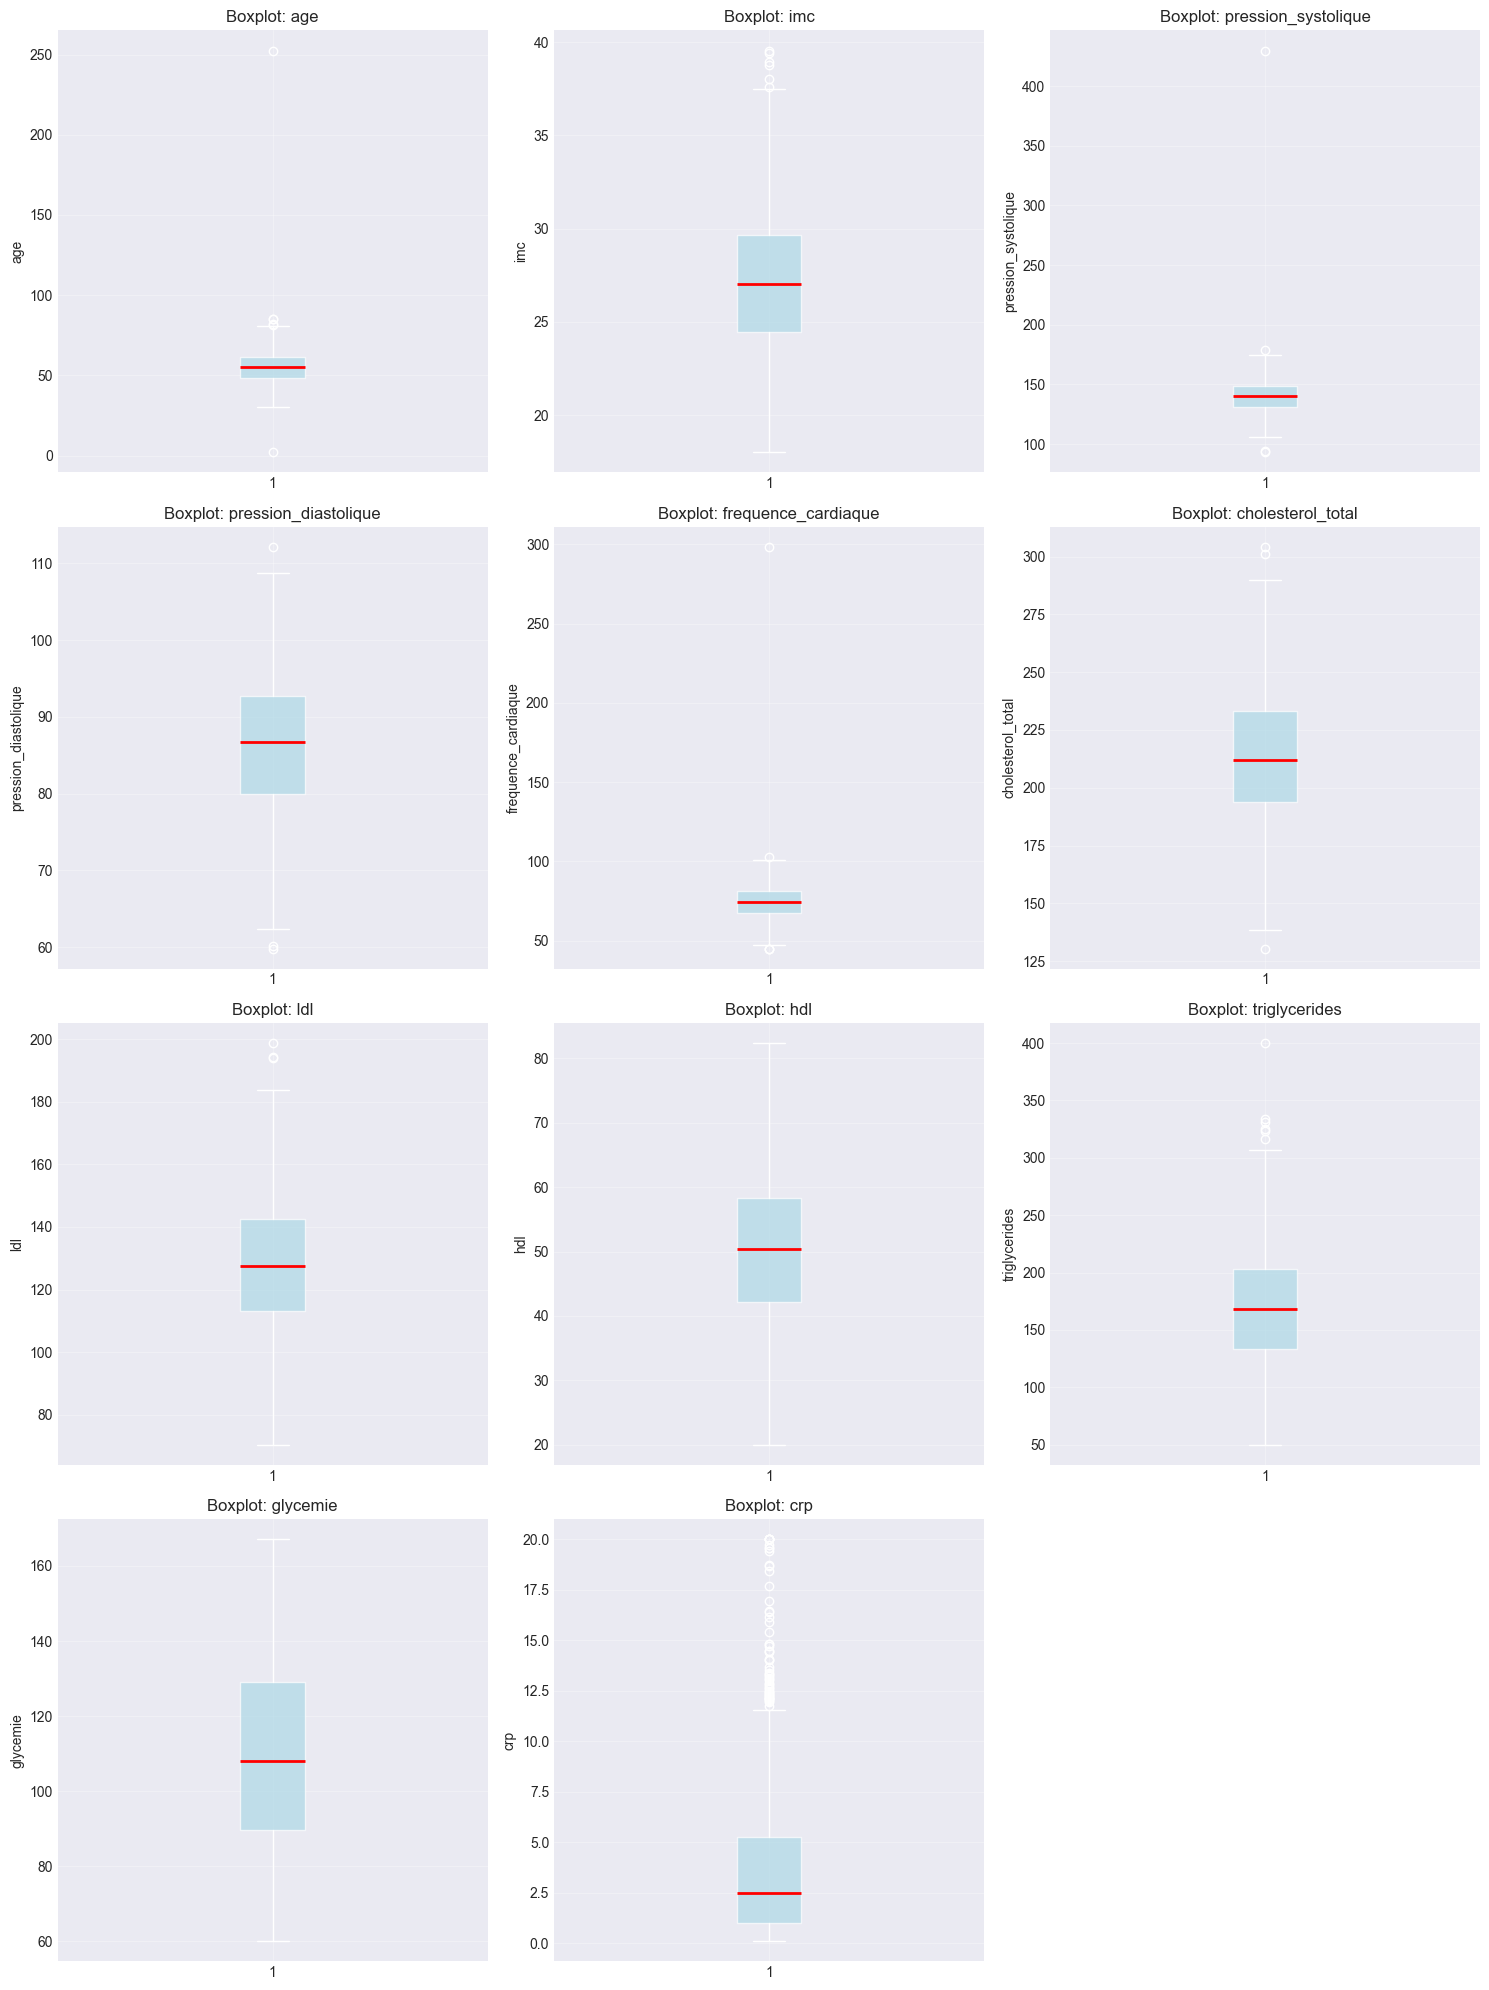

In [273]:
"""
8. BOXPLOTS - DETECTION VISUELLE DES OUTLIERS
"""
print("\n" + "=" * 80)
print("8. BOXPLOTS - DETECTION VISUELLE DES OUTLIERS")
print("=" * 80)

# Boxplots des variables numeriques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_vars > 1 else [axes]

for idx, var in enumerate(variables_numeriques):
    axes[idx].boxplot(df[var].dropna(), vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_ylabel(var)
    axes[idx].set_title(f'Boxplot: {var}')
    axes[idx].grid(True, alpha=0.3)

# Masquer les axes vides
for idx in range(n_vars, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig(dir_stats_desc / 'boxplots_variables_numeriques.png', dpi=300, bbox_inches='tight')
plt.show()



9. MATRICE DE CORRELATION

Correlations les plus fortes (valeur absolue):
              Variable_1            Variable_2  Correlation
40     cholesterol_total                   ldl     0.823226
17                   imc              glycemie     0.338154
52         triglycerides              glycemie     0.326734
19   pression_systolique  pression_diastolique     0.202687
54              glycemie                   crp     0.199171
2                    age  pression_diastolique     0.189137
16                   imc         triglycerides     0.139802
1                    age   pression_systolique     0.124580
18                   imc                   crp     0.104008
26   pression_systolique                   crp     0.092820
33  pression_diastolique                   crp     0.079466
20   pression_systolique   frequence_cardiaque     0.067866
53         triglycerides                   crp     0.063276
41     cholesterol_total                   hdl    -0.060860
36   frequence_cardiaque 

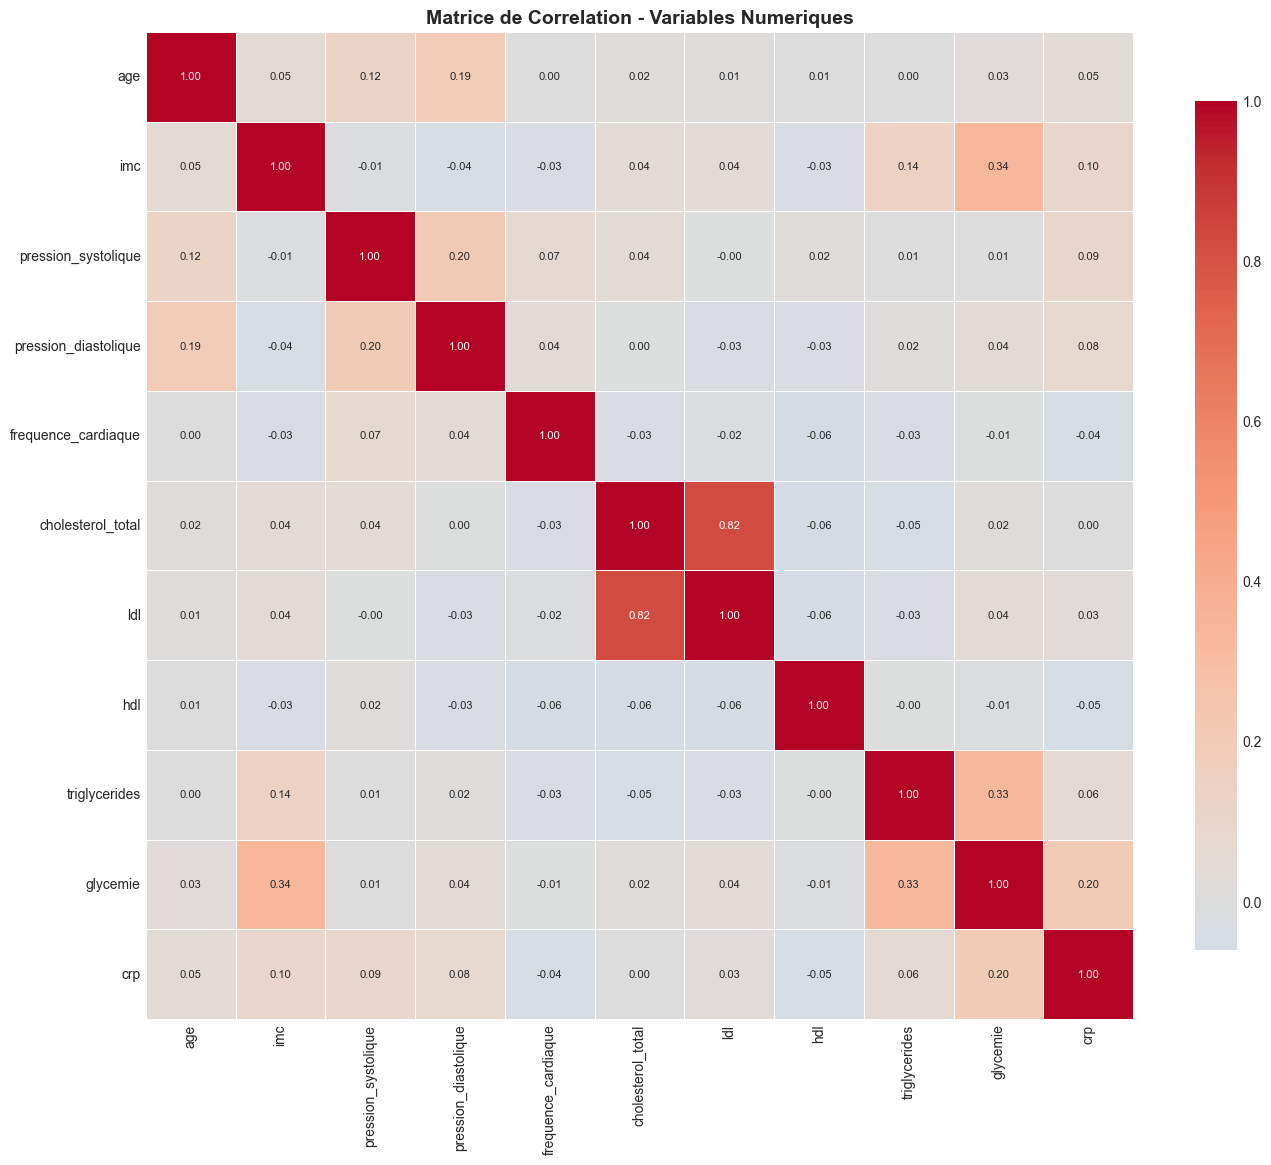

In [274]:
"""
9. MATRICE DE CORRELATION
"""
print("\n" + "=" * 80)
print("9. MATRICE DE CORRELATION")
print("=" * 80)

# Calculer la matrice de correlation pour les variables numeriques
X_num = df[variables_numeriques]
correlation_matrix = X_num.corr()

print("\nCorrelations les plus fortes (valeur absolue):")
# Extraire les paires de correlations
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'Variable_1': correlation_matrix.columns[i],
            'Variable_2': correlation_matrix.columns[j],
            'Correlation': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', key=abs, ascending=False)
print(corr_df.head(15))

# Sauvegarder les correlations
corr_df.to_excel(dir_stats_desc / 'correlations.xlsx', index=False)
correlation_matrix.to_excel(dir_stats_desc / 'matrice_correlation.xlsx')

# Heatmap de correlation
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            ax=ax, annot_kws={'size': 8})
ax.set_title('Matrice de Correlation - Variables Numeriques', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(dir_stats_desc / 'matrice_correlation.png', dpi=300, bbox_inches='tight')
plt.show()



10. ANALYSE DE LA VARIABLE CIBLE: INFARCTUS

Distribution de la variable cible 'infarctus':
   Classe 0 (Pas d'infarctus): 750 patients (75.00%)
   Classe 1 (Infarctus):       250 patients (25.00%)

Taux d'infarctus: 25.00%
Ratio de desequilibre: 3.00:1


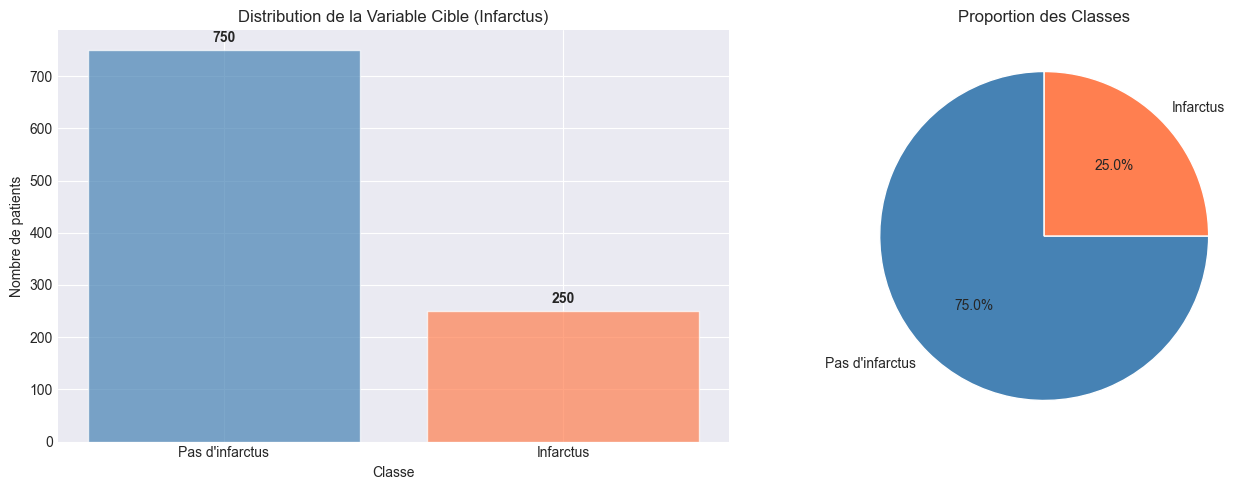

In [275]:
"""
10. ANALYSE DE LA VARIABLE CIBLE ET DESEQUILIBRE DES CLASSES
"""
print("\n" + "=" * 80)
print("10. ANALYSE DE LA VARIABLE CIBLE: INFARCTUS")
print("=" * 80)

# Verifier l'existence de la variable cible
if 'infarctus' in df.columns:
    # Distribution de la variable cible
    target_counts = df['infarctus'].value_counts()
    target_pct = df['infarctus'].value_counts(normalize=True) * 100

    print("\nDistribution de la variable cible 'infarctus':")
    print(f"   Classe 0 (Pas d'infarctus): {target_counts.get(0, 0)} patients ({target_pct.get(0, 0):.2f}%)")
    print(f"   Classe 1 (Infarctus):       {target_counts.get(1, 0)} patients ({target_pct.get(1, 0):.2f}%)")

    # Calculer le taux de desequilibre
    taux_infarctus = df['infarctus'].mean() * 100
    ratio_desequilibre = target_counts.max() / target_counts.min()

    print(f"\nTaux d'infarctus: {taux_infarctus:.2f}%")
    print(f"Ratio de desequilibre: {ratio_desequilibre:.2f}:1")

    # Visualisation de la distribution de la variable cible
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Graphique en barres
    axes[0].bar(target_counts.index, target_counts.values, color=['steelblue', 'coral'], alpha=0.7)
    axes[0].set_xlabel('Classe')
    axes[0].set_ylabel('Nombre de patients')
    axes[0].set_title('Distribution de la Variable Cible (Infarctus)')
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['Pas d\'infarctus', 'Infarctus'])
    for i, v in enumerate(target_counts.values):
        axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

    # Graphique circulaire
    colors = ['steelblue', 'coral']
    axes[1].pie(target_counts.values, labels=['Pas d\'infarctus', 'Infarctus'],
                autopct='%1.1f%%', colors=colors, startangle=90)
    axes[1].set_title('Proportion des Classes')

    plt.tight_layout()
    plt.savefig(dir_variable_cible / 'distribution_variable_cible.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Sauvegarder les statistiques de la variable cible
    target_stats = pd.DataFrame({
        'Classe': ['Pas d\'infarctus', 'Infarctus'],
        'Nombre': target_counts.values,
        'Pourcentage': target_pct.values,
        'Ratio_Desequilibre': [ratio_desequilibre, ratio_desequilibre]
    })
    target_stats.to_excel(dir_variable_cible / 'statistiques_variable_cible.xlsx', index=False)

else:
    print("\nATTENTION: Variable cible 'infarctus' non trouvee dans le dataset")



11. CORRELATION AVEC LA VARIABLE CIBLE

Correlation des variables numeriques avec la variable cible:
                Variable       Type  Correlation_avec_Infarctus
9               glycemie  Numerique                    0.340133
6                    ldl  Numerique                    0.297334
5      cholesterol_total  Numerique                    0.290299
10                   crp  Numerique                    0.265368
0                    age  Numerique                    0.258807
3   pression_diastolique  Numerique                    0.214030
1                    imc  Numerique                    0.209047
2    pression_systolique  Numerique                    0.175093
8          triglycerides  Numerique                    0.108797
7                    hdl  Numerique                   -0.082466
4    frequence_cardiaque  Numerique                   -0.016772


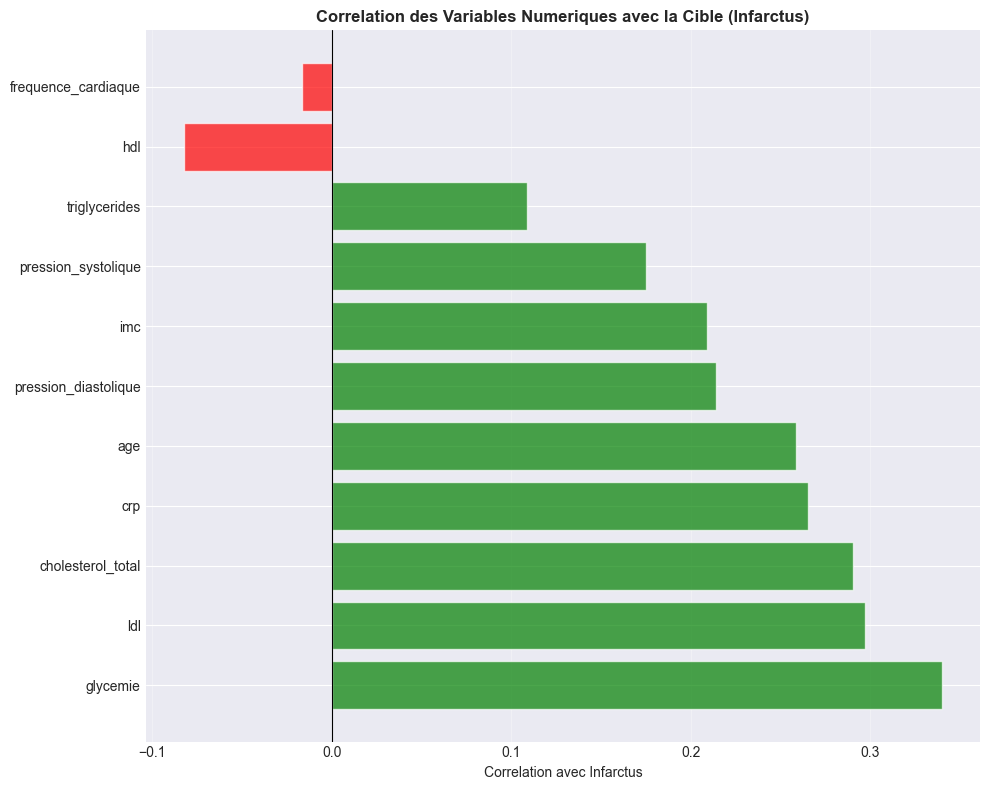


--------------------------------------------------------------------------------
ANALYSE DES VARIABLES CATEGORIELLES AVEC LA CIBLE (Test Chi-2)
--------------------------------------------------------------------------------

tabagisme:
   Chi2 = 37.9049, p-value = 0.0000
   SIGNIFICATIF (seuil alpha=0.05)

Resultats Chi-2 sauvegardes dans: analyse_exploratoire\2_analyse_variable_cible\chi2_categorielles_cible.xlsx

Relation variables categorielles - infarctus:

tabagisme:
infarctus          0          1
tabagisme                      
0          78.095238  21.904762
1          82.329317  17.670683
2          59.734513  40.265487


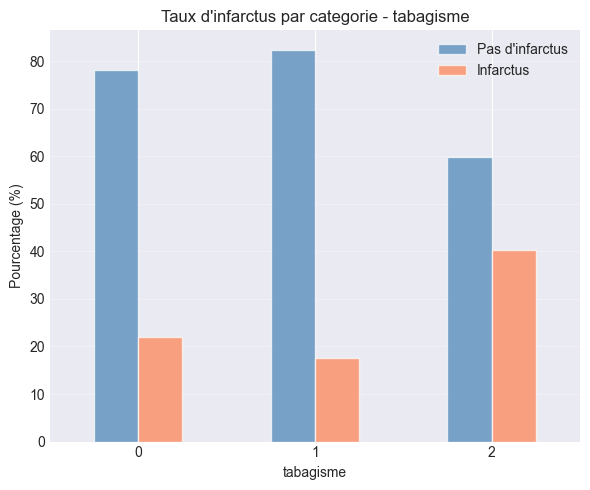


Relation variables binaires - infarctus:

sexe:
infarctus          0          1
sexe                           
0          81.004367  18.995633
1          69.926199  30.073801

hypertension:
infarctus             0          1
hypertension                      
0             95.538058   4.461942
1             62.358643  37.641357

diabete:
infarctus          0          1
diabete                        
0          90.601504   9.398496
1          57.264957  42.735043

hypercholesterolemie:
infarctus                     0          1
hypercholesterolemie                      
0                     85.117057  14.882943
1                     59.950249  40.049751

antecedents_familiaux:
infarctus                      0          1
antecedents_familiaux                      
0                      75.686813  24.313187
1                      73.161765  26.838235

sedentarite:
infarctus            0          1
sedentarite                      
0            76.679842  23.320158
1            73.279

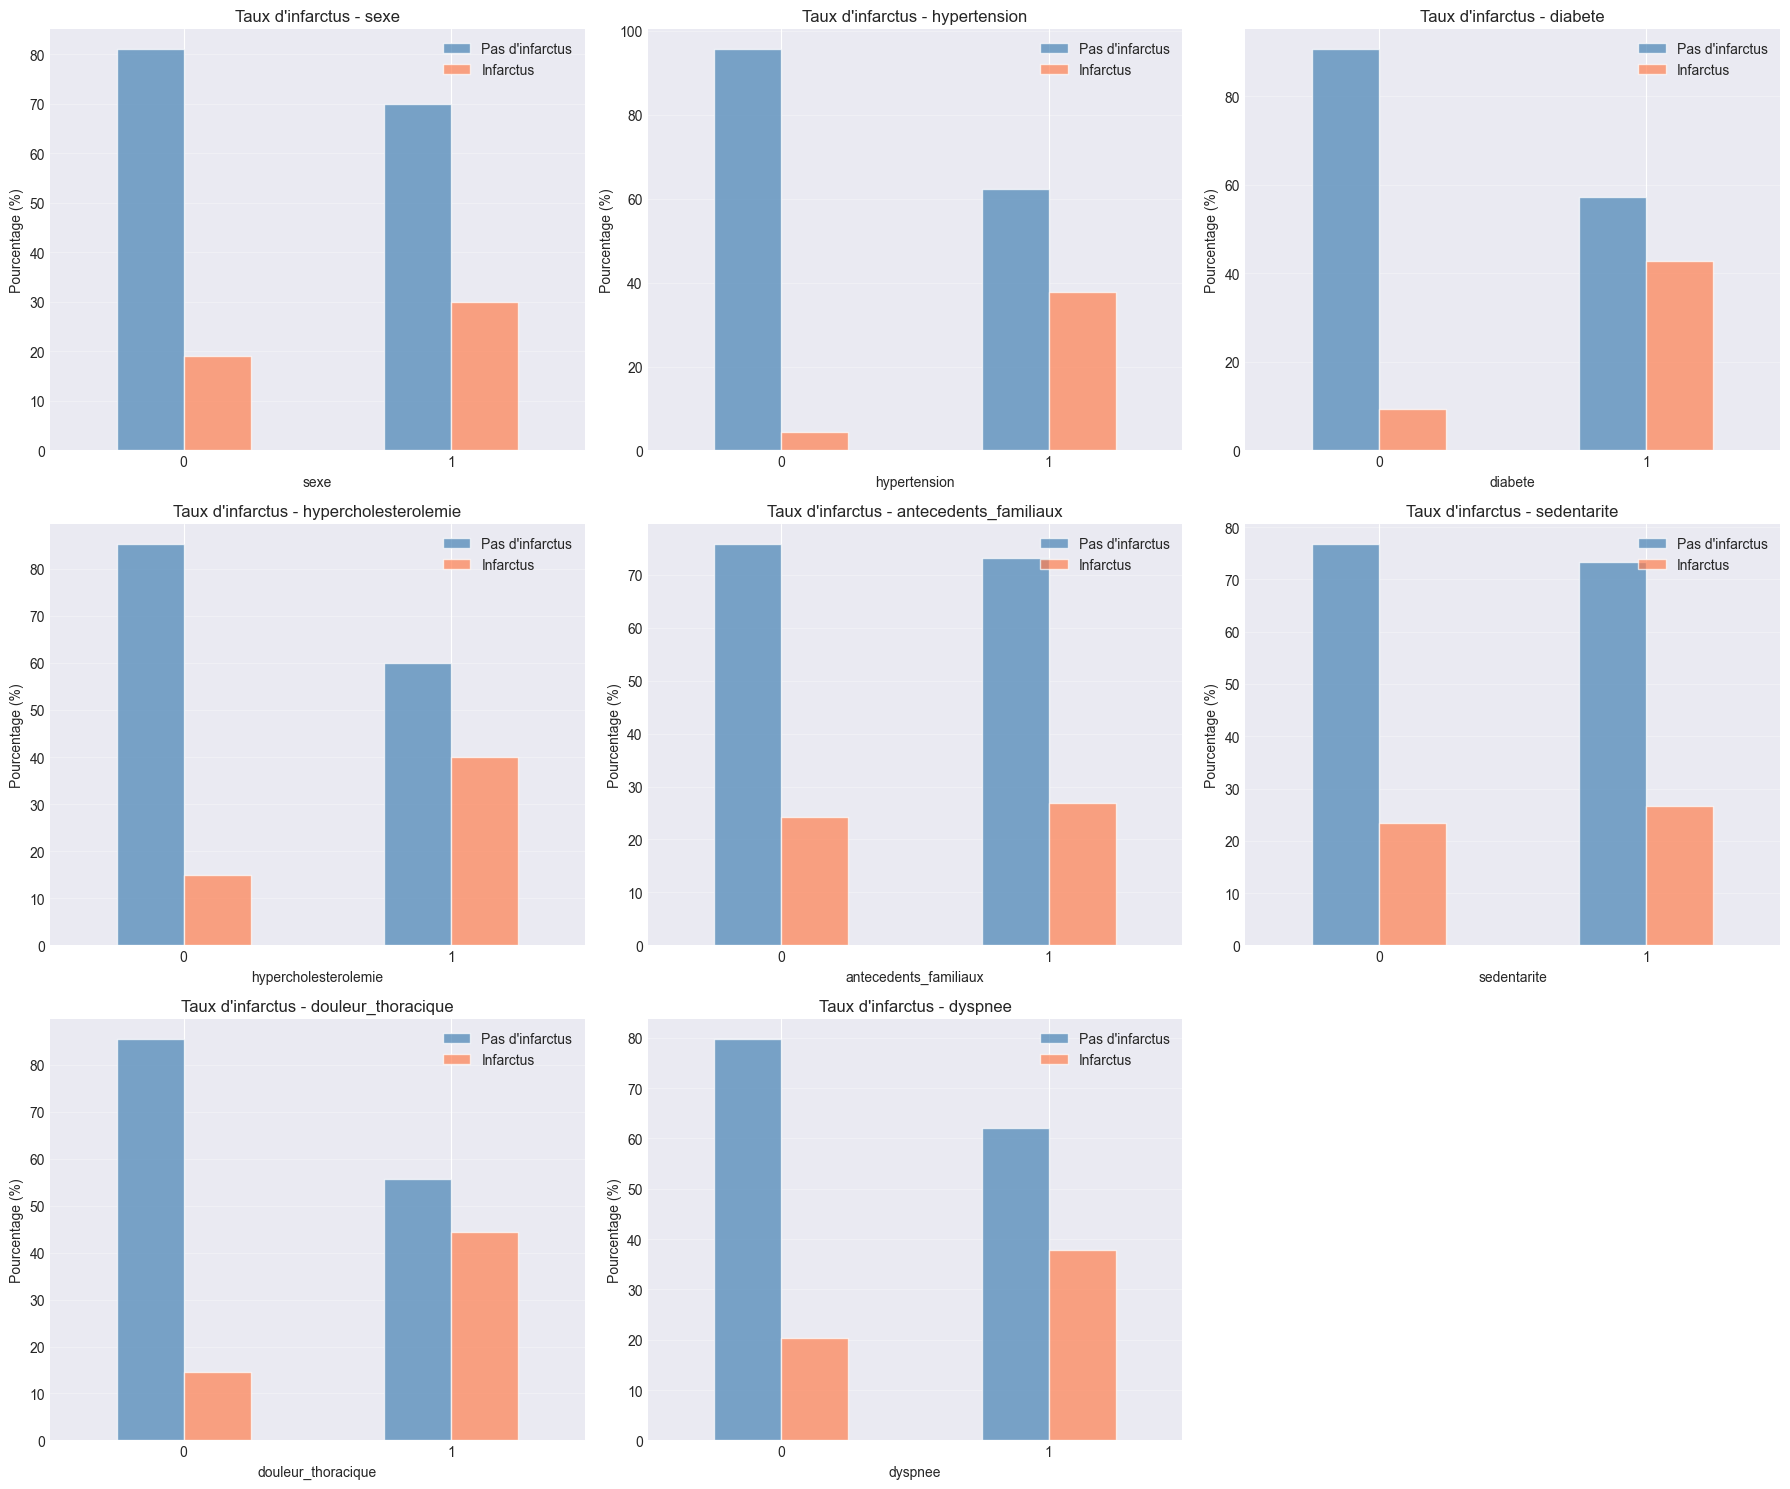

In [276]:
"""
11. CORRELATION AVEC LA VARIABLE CIBLE
"""
print("\n" + "=" * 80)
print("11. CORRELATION AVEC LA VARIABLE CIBLE")
print("=" * 80)

if y is not None:
    # Correlation entre variables numeriques et la cible
    correlations_cible = []
    for var in variables_numeriques:
        corr = df[var].corr(y)
        correlations_cible.append({'Variable': var, 'Type': 'Numerique', 'Correlation_avec_Infarctus': corr})

    corr_cible_df = pd.DataFrame(correlations_cible).sort_values('Correlation_avec_Infarctus',
                                                                   key=abs, ascending=False)

    print("\nCorrelation des variables numeriques avec la variable cible:")
    print(corr_cible_df)

    # Sauvegarder
    corr_cible_df.to_excel(dir_variable_cible / 'correlation_avec_cible.xlsx', index=False)

    # Visualisation
    fig, ax = plt.subplots(figsize=(10, 8))
    colors = ['red' if x < 0 else 'green' for x in corr_cible_df['Correlation_avec_Infarctus']]
    ax.barh(corr_cible_df['Variable'], corr_cible_df['Correlation_avec_Infarctus'], color=colors, alpha=0.7)
    ax.set_xlabel('Correlation avec Infarctus')
    ax.set_title('Correlation des Variables Numeriques avec la Cible (Infarctus)', fontweight='bold')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig(dir_variable_cible / 'correlation_variables_cible.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Analyse des variables categorielles avec Chi-2
    if len(variables_categorielles) > 0:
        from scipy.stats import chi2_contingency

        print("\n" + "-" * 80)
        print("ANALYSE DES VARIABLES CATEGORIELLES AVEC LA CIBLE (Test Chi-2)")
        print("-" * 80)

        chi2_results = []
        for var in variables_categorielles:
            contingency_table = pd.crosstab(df[var], y)
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            chi2_results.append({
                'Variable': var,
                'Type': 'Categorielle',
                'Chi2': chi2,
                'P-value': p_value,
                'Significatif': 'Oui' if p_value < 0.05 else 'Non'
            })

            print(f"\n{var}:")
            print(f"   Chi2 = {chi2:.4f}, p-value = {p_value:.4f}")
            print(f"   {'SIGNIFICATIF' if p_value < 0.05 else 'NON SIGNIFICATIF'} (seuil alpha=0.05)")

        chi2_df = pd.DataFrame(chi2_results)
        chi2_df.to_excel(dir_variable_cible / 'chi2_categorielles_cible.xlsx', index=False)
        print(f"\nResultats Chi-2 sauvegardes dans: {dir_variable_cible / 'chi2_categorielles_cible.xlsx'}")

        if len(variables_categorielles) > 0:
            print("\nRelation variables categorielles - infarctus:")

            fig, axes = plt.subplots(1, n_vars_cat, figsize=(6*n_vars_cat, 5))
            axes = [axes] if n_vars_cat == 1 else axes

            for idx, var in enumerate(variables_categorielles):
                # Tableau croise
                contingency = pd.crosstab(df[var], y, normalize='index') * 100
                print(f"\n{var}:")
                print(contingency)

                # Visualisation
                contingency.plot(kind='bar', ax=axes[idx], color=['steelblue', 'coral'], alpha=0.7)
                axes[idx].set_xlabel(var)
                axes[idx].set_ylabel('Pourcentage (%)')
                axes[idx].set_title(f'Taux d\'infarctus par categorie - {var}')
                axes[idx].legend(['Pas d\'infarctus', 'Infarctus'])
                axes[idx].grid(True, alpha=0.3, axis='y')
                axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)

            plt.tight_layout()
            plt.savefig(dir_variable_cible / 'categorielles_vs_infarctus.png', dpi=300, bbox_inches='tight')
            plt.show()

        if len(variables_binaires) > 0:
            print("\nRelation variables binaires - infarctus:")

            n_vars_bin = len(variables_binaires)
            n_cols_rel = min(3, n_vars_bin)
            n_rows_rel = (n_vars_bin + n_cols_rel - 1) // n_cols_rel

            fig, axes = plt.subplots(n_rows_rel, n_cols_rel, figsize=(6 * n_cols_rel, 5 * n_rows_rel))

            if n_vars_bin == 1:
                axes = [axes]
            else:
                axes = axes.flatten()

            for idx, var in enumerate(variables_binaires):
                # Tableau croise
                contingency = pd.crosstab(df[var], y, normalize='index') * 100
                print(f"\n{var}:")
                print(contingency)

                # Visualisation
                contingency.plot(kind='bar', ax=axes[idx], color=['steelblue', 'coral'], alpha=0.7)
                axes[idx].set_xlabel(var)
                axes[idx].set_ylabel('Pourcentage (%)')
                axes[idx].set_title(f'Taux d\'infarctus - {var}')
                axes[idx].legend(['Pas d\'infarctus', 'Infarctus'])
                axes[idx].grid(True, alpha=0.3, axis='y')
                axes[idx].set_xticklabels(['0', '1'], rotation=0)

            # Masquer les axes vides
            for idx in range(n_vars_bin, len(axes)):
                axes[idx].axis('off')

            plt.tight_layout()
            plt.savefig(dir_variable_cible / 'binaires_vs_infarctus.png', dpi=300, bbox_inches='tight')
            plt.show()


In [277]:
"""
12. PREPARATION POUR LES METHODES NON SUPERVISEES
"""
print("\n" + "=" * 80)
print("12. PREPARATION POUR METHODES NON SUPERVISEES")
print("=" * 80)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Utiliser les variables numeriques
X_num = X[variables_numeriques].copy()

# Standardiser UNIQUEMENT les variables numeriques
print("\nStandardisation des variables numeriques...")
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=variables_numeriques, index=X_num.index)

print(f"Variables numeriques standardisees (moyenne=0, ecart-type=1)")
print(f"Shape: {X_num_scaled_df.shape}")
print(f"\nVerification de la standardisation (variables numeriques):")
print(f"Moyennes: {X_num_scaled.mean(axis=0)[:5]} ...")
print(f"Ecarts-types: {X_num_scaled.std(axis=0)[:5]} ...")

# Encoder les variables categorielles si elles existent (SANS standardisation)
if len(variables_categorielles) > 0:
    print(f"\nEncodage des variables categorielles ({len(variables_categorielles)})...")
    print("Methode: One-Hot Encoding avec drop='first' (evite la multicollinearite)")

    # One-Hot Encoding pour les variables categorielles
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_cat_encoded = encoder.fit_transform(df[variables_categorielles])

    # Creer les noms de colonnes pour les variables encodees
    encoded_feature_names = []
    for i, var in enumerate(variables_categorielles):
        categories = encoder.categories_[i][1:]  # Exclure la premiere categorie (dropped)
        for cat in categories:
            encoded_feature_names.append(f"{var}_{cat}")

    X_cat_df = pd.DataFrame(X_cat_encoded, columns=encoded_feature_names, index=X_num.index)

    print(f"Variables categorielles encodees (NON standardisees): {encoded_feature_names}")
    print(f"Ces variables restent binaires (0 ou 1)")

    # Combiner variables numeriques STANDARDISEES et categorielles encodees NON STANDARDISEES
    X_combined = pd.concat([X_num_scaled_df, X_cat_df], axis=1)
    print(f"\nDimensions apres encodage et standardisation: {X_combined.shape}")
    print(f"   - Variables numeriques standardisees: {X_num_scaled_df.shape[1]}")
    print(f"   - Variables categorielles encodees: {X_cat_df.shape[1]}")
    print(f"   - Total features: {X_combined.shape[1]}")
else:
    X_combined = X_num_scaled_df.copy()
    print("\nAucune variable categorielle a encoder")

# Convertir en array numpy pour sklearn
X_scaled = X_combined.values

# Sauvegarder les noms de features pour reference ulterieure
all_feature_names = list(X_combined.columns)
print(f"\nNombre total de features pour analyse non supervisee: {len(all_feature_names)}")



12. PREPARATION POUR METHODES NON SUPERVISEES

Standardisation des variables numeriques...
Variables numeriques standardisees (moyenne=0, ecart-type=1)
Shape: (1000, 11)

Verification de la standardisation (variables numeriques):
Moyennes: [ 6.12843110e-16 -1.20792265e-16 -2.08011386e-15 -1.15463195e-17
 -1.05337961e-15] ...
Ecarts-types: [1. 1. 1. 1. 1.] ...

Encodage des variables categorielles (1)...
Methode: One-Hot Encoding avec drop='first' (evite la multicollinearite)
Variables categorielles encodees (NON standardisees): ['tabagisme_1', 'tabagisme_2']
Ces variables restent binaires (0 ou 1)

Dimensions apres encodage et standardisation: (1000, 13)
   - Variables numeriques standardisees: 11
   - Variables categorielles encodees: 2
   - Total features: 13

Nombre total de features pour analyse non supervisee: 13



13. ANALYSE EN COMPOSANTES PRINCIPALES (PCA)

Variance expliquee par composante:
   PC1:  16.30% (cumulee:  16.30%)
   PC2:  14.44% (cumulee:  30.75%)
   PC3:  12.03% (cumulee:  42.78%)
   PC4:   9.32% (cumulee:  52.10%)
   PC5:   8.54% (cumulee:  60.64%)
   PC6:   8.13% (cumulee:  68.78%)
   PC7:   7.78% (cumulee:  76.55%)
   PC8:   7.08% (cumulee:  83.63%)
   PC9:   6.68% (cumulee:  90.31%)
   PC10:   5.04% (cumulee:  95.35%)

Nombre de composantes pour 90% de variance: 9


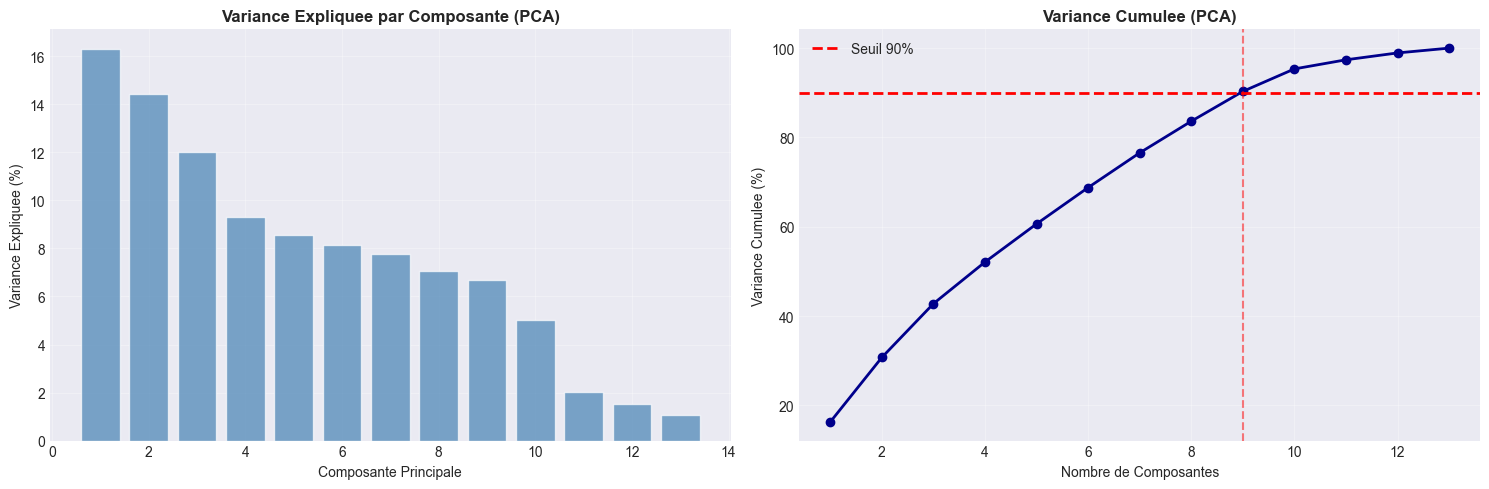


Variance expliquee par les 2 premieres composantes: 30.75%

Contribution des variables aux 2 premieres composantes:
                          PC1       PC2
ldl                  0.683974 -0.146087
cholesterol_total    0.682854 -0.156229
imc                  0.139888  0.455296
glycemie             0.135332  0.589537
hdl                 -0.105491 -0.035012
crp                  0.091481  0.348459
age                  0.053720  0.147837
pression_systolique  0.049880  0.122079
frequence_cardiaque -0.044239 -0.029942
triglycerides        0.022296  0.462237


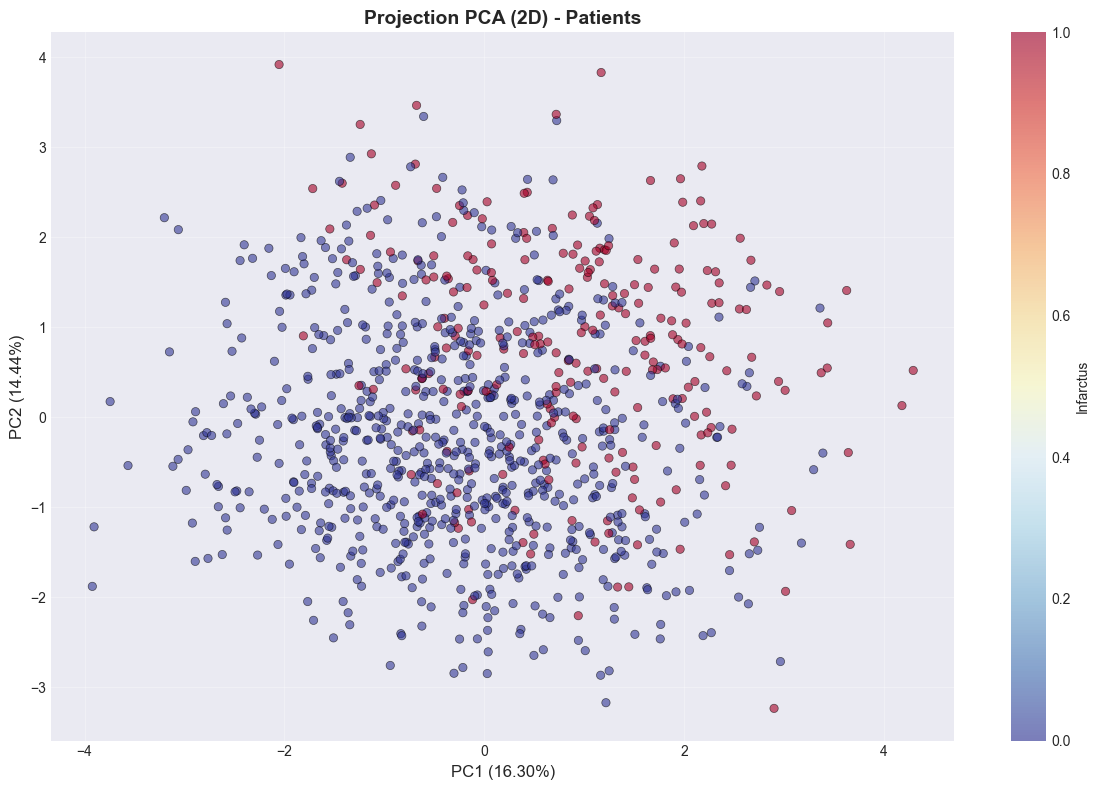

In [278]:
"""
13. ANALYSE EN COMPOSANTES PRINCIPALES (PCA)
"""
print("\n" + "=" * 80)
print("13. ANALYSE EN COMPOSANTES PRINCIPALES (PCA)")
print("=" * 80)

from sklearn.decomposition import PCA

# PCA avec toutes les composantes
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Variance expliquee
variance_expliquee = pca_full.explained_variance_ratio_
variance_cumulative = np.cumsum(variance_expliquee)

print("\nVariance expliquee par composante:")
for i in range(min(10, len(variance_expliquee))):
    print(f"   PC{i+1}: {variance_expliquee[i]*100:6.2f}% (cumulee: {variance_cumulative[i]*100:6.2f}%)")

# Nombre de composantes pour 90% de variance
n_comp_90 = np.argmax(variance_cumulative >= 0.90) + 1
print(f"\nNombre de composantes pour 90% de variance: {n_comp_90}")

# Visualisation: Variance expliquee
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Variance par composante
axes[0].bar(range(1, len(variance_expliquee) + 1), variance_expliquee * 100,
            alpha=0.7, color='steelblue')
axes[0].set_xlabel('Composante Principale')
axes[0].set_ylabel('Variance Expliquee (%)')
axes[0].set_title('Variance Expliquee par Composante (PCA)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Variance cumulee
axes[1].plot(range(1, len(variance_cumulative) + 1), variance_cumulative * 100,
             marker='o', linewidth=2, color='darkblue')
axes[1].axhline(y=90, color='red', linestyle='--', label='Seuil 90%', linewidth=2)
axes[1].axvline(x=n_comp_90, color='red', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Nombre de Composantes')
axes[1].set_ylabel('Variance Cumulee (%)')
axes[1].set_title('Variance Cumulee (PCA)', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(dir_non_supervise / 'pca_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# PCA 2D pour visualisation
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\nVariance expliquee par les 2 premieres composantes: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")

# Contribution des variables
composantes = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=all_feature_names
)

print("\nContribution des variables aux 2 premieres composantes:")
print(composantes.sort_values('PC1', key=abs, ascending=False).head(10))

# Sauvegarder les contributions
composantes.to_excel(dir_non_supervise / 'pca_contributions_variables.xlsx')

# Visualisation: Projection PCA 2D
fig, ax = plt.subplots(figsize=(12, 8))
if y is not None:
    scatter = ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='RdYlBu_r',
                        alpha=0.6, edgecolors='black', linewidth=0.5)
    plt.colorbar(scatter, label='Infarctus', ax=ax)
else:
    scatter = ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c='steelblue',
                        alpha=0.6, edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12)
ax.set_title('Projection PCA (2D) - Patients', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(dir_non_supervise / 'pca_projection_2d.png', dpi=300, bbox_inches='tight')
plt.show()



14. CLUSTERING K-MEANS

Recherche du nombre optimal de clusters...
   K=2: Inertie=10154.73, Silhouette=0.105
   K=3: Inertie=9383.48, Silhouette=0.097
   K=4: Inertie=8889.01, Silhouette=0.098
   K=5: Inertie=8504.14, Silhouette=0.090
   K=6: Inertie=8164.57, Silhouette=0.088
   K=7: Inertie=7970.78, Silhouette=0.083
   K=8: Inertie=7642.48, Silhouette=0.080
   K=9: Inertie=7448.53, Silhouette=0.080
   K=10: Inertie=7217.29, Silhouette=0.079


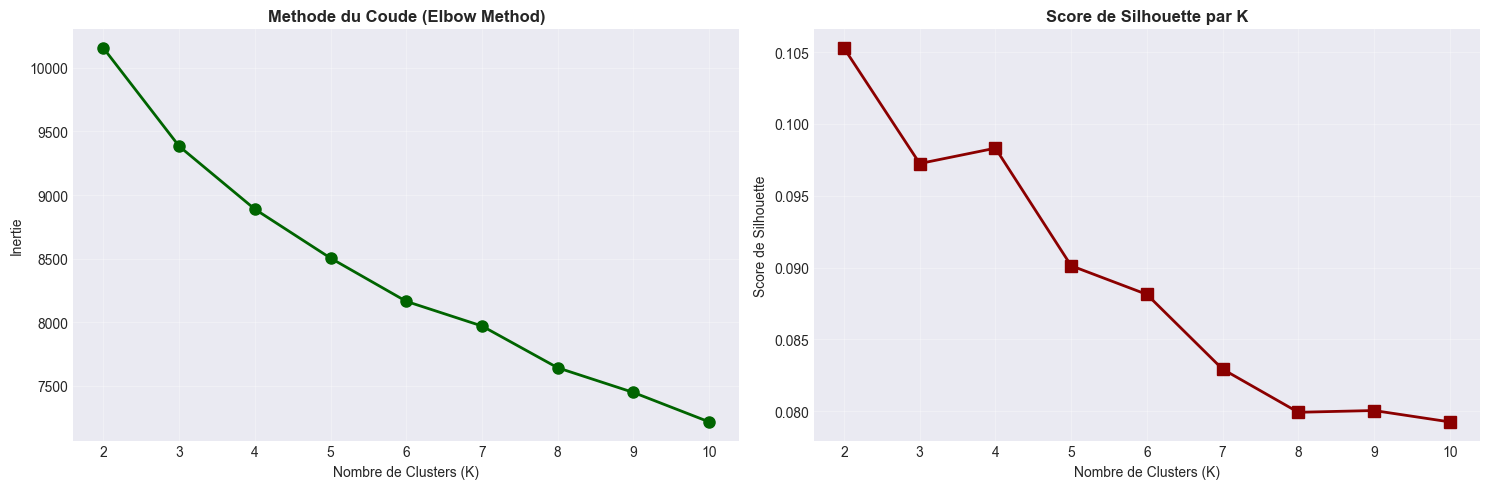


Nombre optimal de clusters (meilleur silhouette): K=2

Metriques de clustering (K=2):
   Silhouette Score: 0.105 (plus proche de 1 = meilleur)
   Davies-Bouldin Index: 2.740 (plus proche de 0 = meilleur)

Distribution des patients par cluster:
   Cluster 0: 509 patients (50.90%)
   Cluster 1: 491 patients (49.10%)


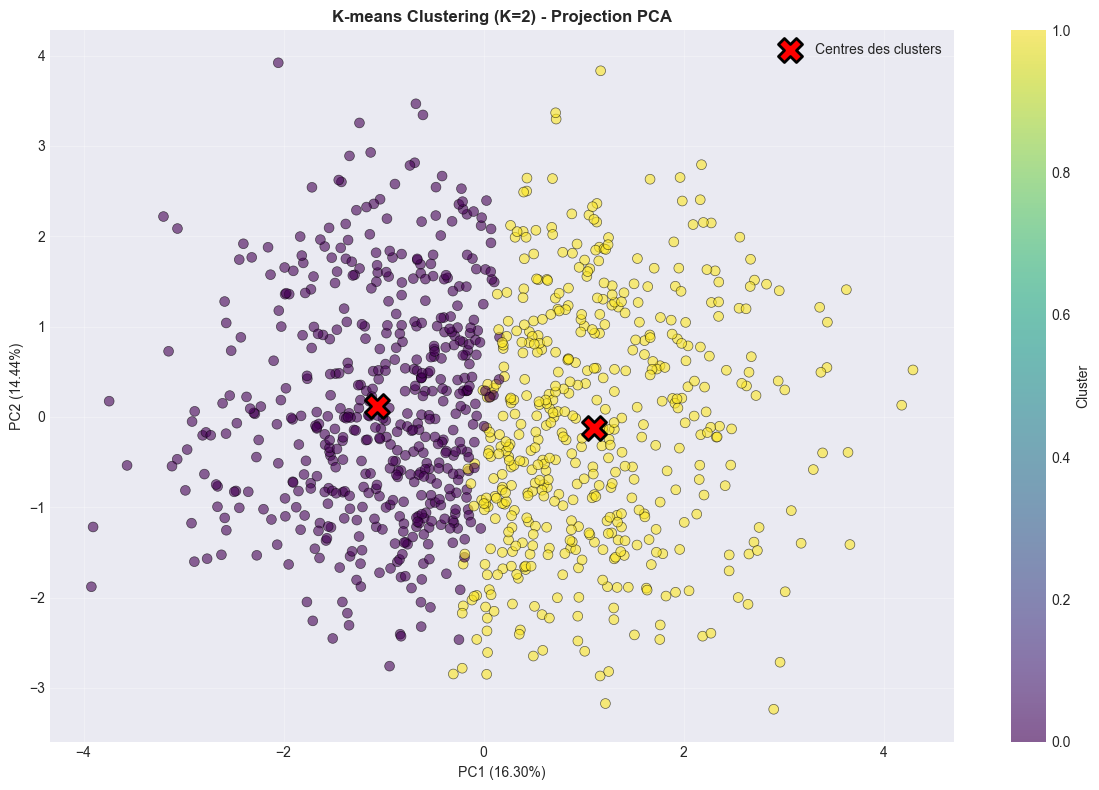


Profil moyen des clusters (variables non standardisees):
               age        imc  pression_systolique  pression_diastolique  \
Cluster                                                                    
0        55.104838  26.502750           139.639739             86.828438   
1        55.546005  27.661113           139.879104             85.901419   

         frequence_cardiaque  cholesterol_total         ldl        hdl  \
Cluster                                                                  
0                  75.494829         190.964865  112.469416  51.906234   
1                  73.564169         234.852995  144.798261  48.508718   

         triglycerides    glycemie       crp  
Cluster                                       
0           171.076948  107.784330  3.623341  
1           167.074417  110.636657  4.071340  

Relation entre clusters et infarctus:
infarctus    0    1   All
row_0                    
0          439   70   509
1          311  180   491
All      

In [279]:
"""
14. CLUSTERING K-MEANS
"""
print("\n" + "=" * 80)
print("14. CLUSTERING K-MEANS")
print("=" * 80)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Methode du coude pour determiner K optimal
inertias = []
silhouette_scores = []
K_range = range(2, 11)

print("\nRecherche du nombre optimal de clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    print(f"   K={k}: Inertie={kmeans.inertia_:.2f}, Silhouette={sil_score:.3f}")

# Visualisation: Methode du coude et silhouette
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(K_range, inertias, marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[0].set_xlabel('Nombre de Clusters (K)')
axes[0].set_ylabel('Inertie')
axes[0].set_title('Methode du Coude (Elbow Method)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='darkred')
axes[1].set_xlabel('Nombre de Clusters (K)')
axes[1].set_ylabel('Score de Silhouette')
axes[1].set_title('Score de Silhouette par K', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(dir_non_supervise / 'kmeans_optimal_k.png', dpi=300, bbox_inches='tight')
plt.show()

# Choisir K optimal
k_optimal = K_range[np.argmax(silhouette_scores)]
print(f"\nNombre optimal de clusters (meilleur silhouette): K={k_optimal}")

# K-means final
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters_kmeans = kmeans_final.fit_predict(X_scaled)

# Metriques
silhouette = silhouette_score(X_scaled, clusters_kmeans)
davies_bouldin = davies_bouldin_score(X_scaled, clusters_kmeans)

print(f"\nMetriques de clustering (K={k_optimal}):")
print(f"   Silhouette Score: {silhouette:.3f} (plus proche de 1 = meilleur)")
print(f"   Davies-Bouldin Index: {davies_bouldin:.3f} (plus proche de 0 = meilleur)")

# Distribution des clusters
print(f"\nDistribution des patients par cluster:")
cluster_counts = pd.Series(clusters_kmeans).value_counts().sort_index()
for cluster, count in cluster_counts.items():
    pct = count / len(clusters_kmeans) * 100
    print(f"   Cluster {cluster}: {count} patients ({pct:.2f}%)")

# Visualisation: Clusters sur projection PCA
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters_kmeans, cmap='viridis',
                     alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
centers_pca = pca_2d.transform(kmeans_final.cluster_centers_)
ax.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='X', s=300, c='red',
           edgecolors='black', linewidth=2, label='Centres des clusters')
ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_title(f'K-means Clustering (K={k_optimal}) - Projection PCA', fontweight='bold')
plt.colorbar(scatter, label='Cluster', ax=ax)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(dir_non_supervise / 'kmeans_clusters_pca.png', dpi=300, bbox_inches='tight')
plt.show()

# Profil des clusters
X_num_with_clusters = X_num.copy()
X_num_with_clusters['Cluster'] = clusters_kmeans
cluster_profiles = X_num_with_clusters.groupby('Cluster').mean()

print("\nProfil moyen des clusters (variables non standardisees):")
print(cluster_profiles)

cluster_profiles.to_excel(dir_non_supervise / 'profils_clusters_kmeans.xlsx')

# Relation clusters - infarctus
if y is not None:
    print("\nRelation entre clusters et infarctus:")
    contingency = pd.crosstab(clusters_kmeans, y, margins=True)
    print(contingency)

    print("\nTaux d'infarctus par cluster:")
    for cluster in range(k_optimal):
        mask = clusters_kmeans == cluster
        taux = y[mask].mean() * 100
        print(f"   Cluster {cluster}: {taux:.2f}%")

    contingency.to_excel(dir_non_supervise / 'clusters_vs_infarctus.xlsx')



15. CLUSTERING HIERARCHIQUE AVEC DISTANCE DE GOWER

La distance de Gower est particulierement adaptee pour:
   - Les variables mixtes (numeriques, categorielles, binaires)
   - Le contexte medical avec des profils patients heterogenes
   - La normalisation automatique de toutes les variables

Preparation des donnees pour la distance de Gower...

Donnees pour Gower:
   - Variables binaires: 8
   - Variables categorielles: 1
   - Variables numeriques: 11
   - Total: 20 variables pour 1000 patients

Calcul de la matrice de distance de Gower...
(Cela peut prendre quelques instants...)
Matrice de Gower calculee: (1000, 1000)
Distance moyenne: 0.2935
Distance min: 0.0000, max: 0.6516

Calcul du dendrogramme (methode average avec distance Gower)...


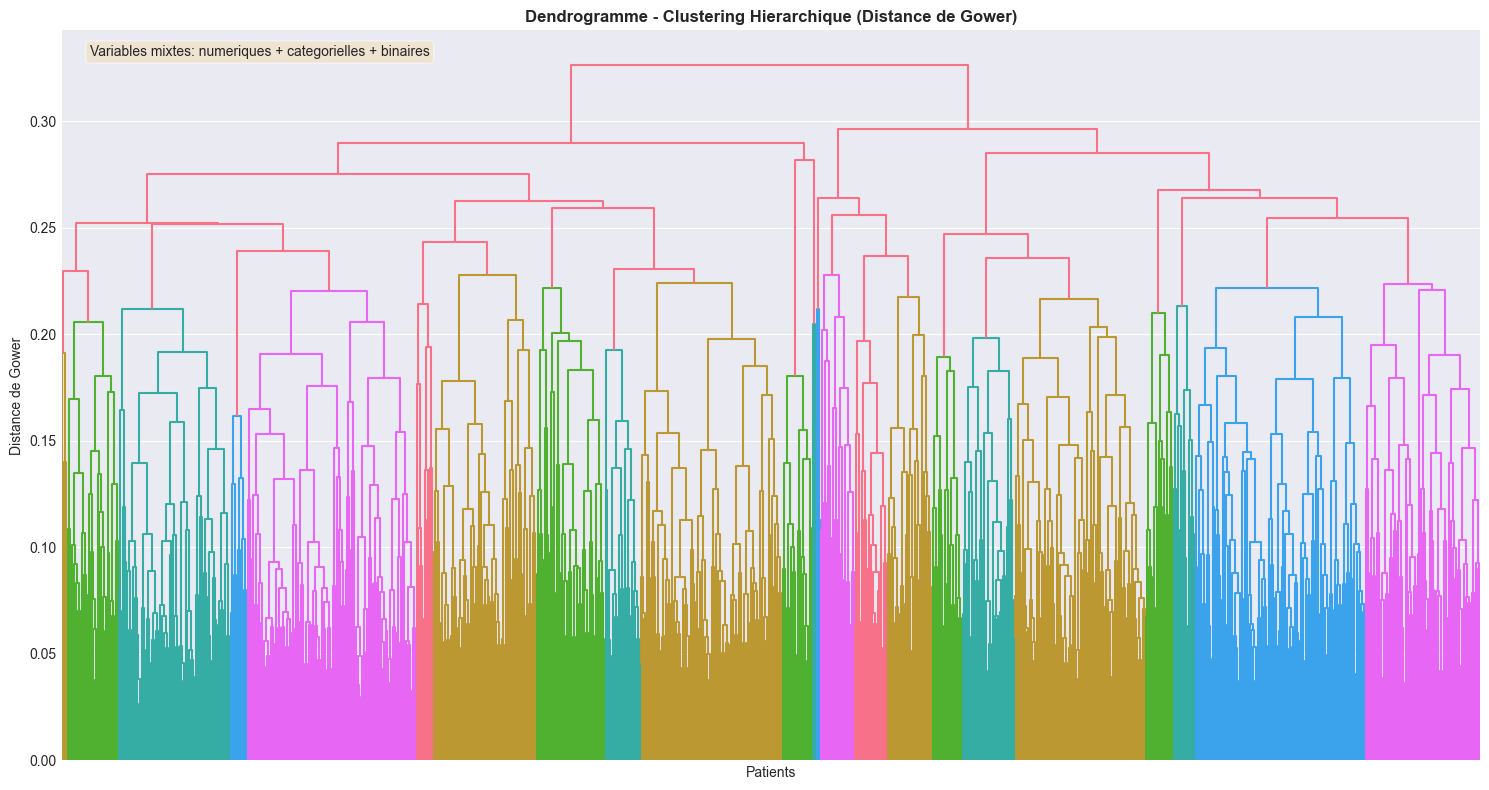


Clustering hierarchique avec distance de Gower (K=2)...

Clustering hierarchique applique avec 2 clusters

Distribution des patients par cluster (hierarchique Gower):
   Cluster 0: 468 patients (46.80%)
   Cluster 1: 532 patients (53.20%)


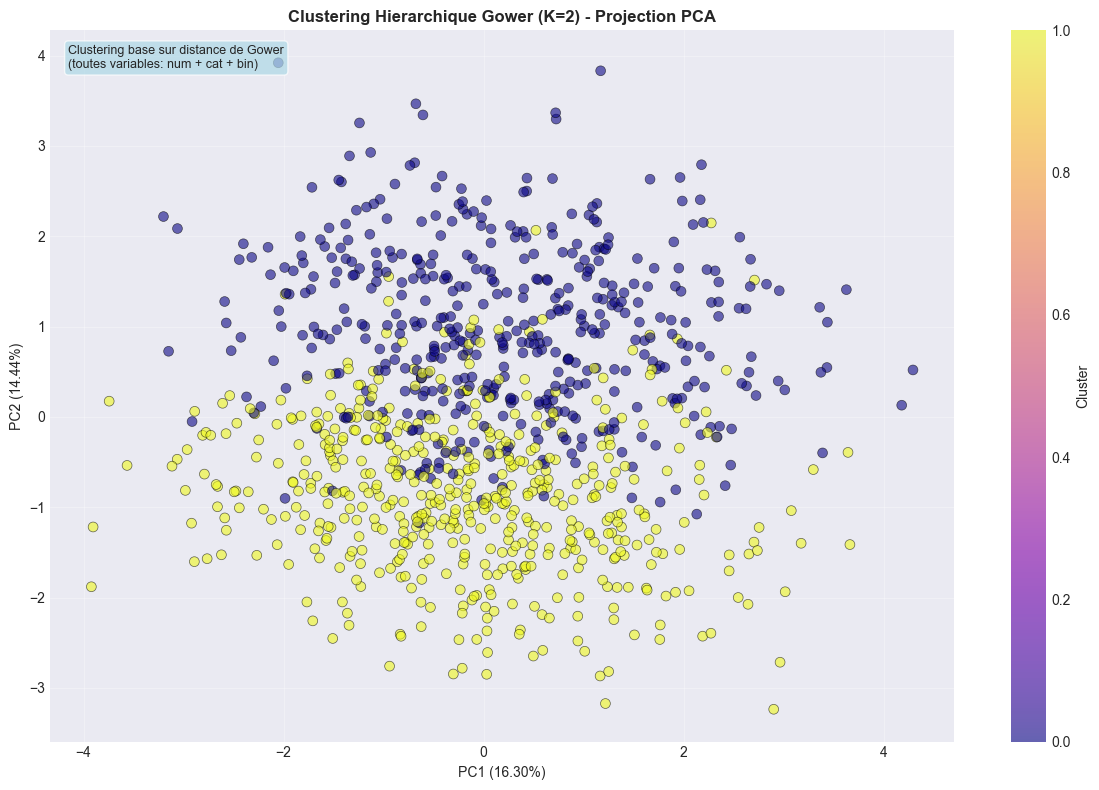


Profil des clusters (Gower) - Statistiques par type de variable:

Variables numeriques - Moyennes par cluster:
               age        imc  pression_systolique  pression_diastolique  \
Cluster                                                                    
0        55.204457  28.771127           139.516272             86.666124   
1        55.424370  25.576352           139.969270             86.115651   

         frequence_cardiaque  cholesterol_total         ldl        hdl  \
Cluster                                                                  
0                  74.223554         212.222306  128.597864  50.212681   
1                  74.831301         212.770484  128.118569  50.260374   

         triglycerides    glycemie      crp  
Cluster                                      
0           191.552170  130.183504  4.80459  
1           149.370846   90.712299  2.99767  

Variables categorielles - Mode par cluster:

tabagisme:
   Cluster 0: Mode = 0 (244 patients)
   Clus

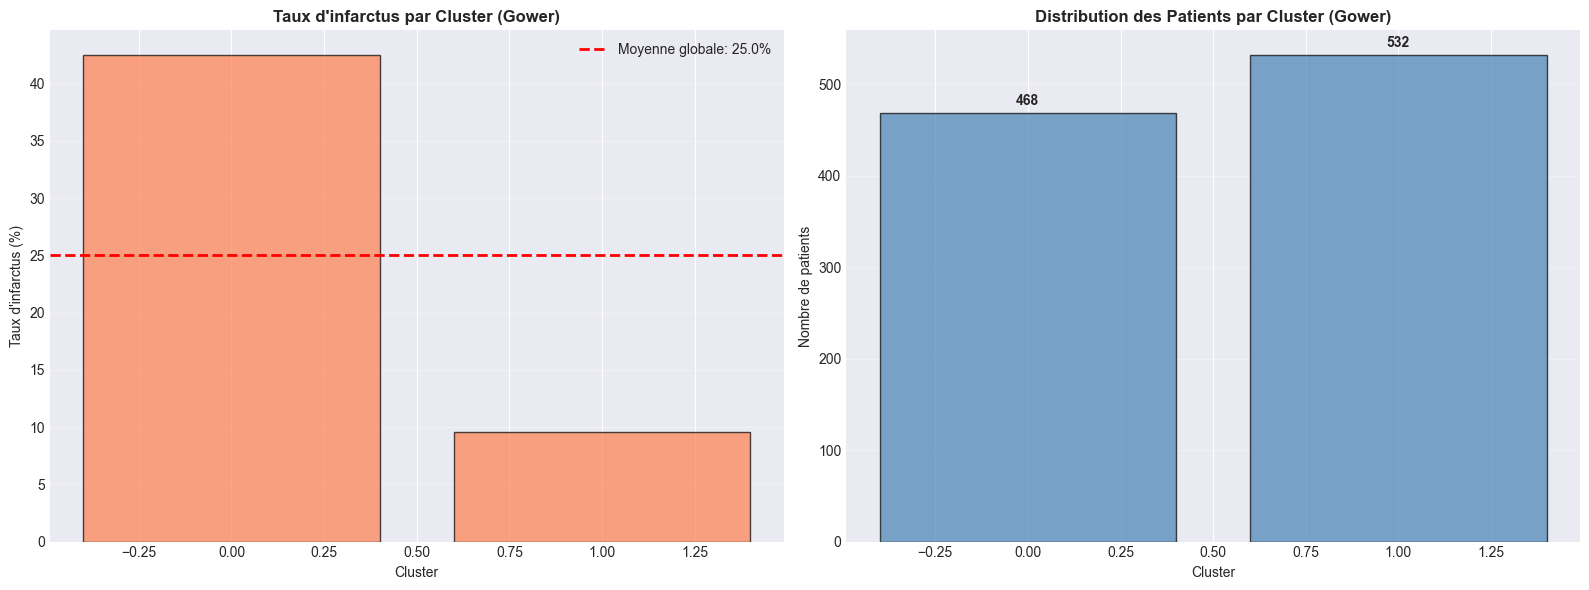


CLUSTERING HIERARCHIQUE AVEC DISTANCE DE GOWER TERMINE

Avantages de la methode Gower:
   - Prend en compte TOUTES les variables (numeriques + categorielles + binaires)
   - Plus approprie pour le contexte medical
   - Normalisation automatique et equilibree de toutes les variables
   - Pas de biais lie a l'encodage One-Hot


In [280]:
"""
15. CLUSTERING HIERARCHIQUE AVEC DISTANCE DE GOWER
"""
print("\n" + "=" * 80)
print("15. CLUSTERING HIERARCHIQUE AVEC DISTANCE DE GOWER")
print("=" * 80)

print("\nLa distance de Gower est particulierement adaptee pour:")
print("   - Les variables mixtes (numeriques, categorielles, binaires)")
print("   - Le contexte medical avec des profils patients heterogenes")
print("   - La normalisation automatique de toutes les variables")

# Installer gower si necessaire
try:
    import gower
except ImportError:
    print("\nInstallation de la librairie gower...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'gower'])
    import gower

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Preparer les donnees pour Gower (utiliser TOUTES les variables originales)
print("\nPreparation des donnees pour la distance de Gower...")

# Combiner toutes les variables (binaires, categorielles, numeriques)
X_gower = X.copy()

print(f"\nDonnees pour Gower:")
print(f"   - Variables binaires: {len(variables_binaires)}")
print(f"   - Variables categorielles: {len(variables_categorielles)}")
print(f"   - Variables numeriques: {len(variables_numeriques)}")
print(f"   - Total: {X_gower.shape[1]} variables pour {X_gower.shape[0]} patients")

# Calculer la matrice de distance de Gower
print("\nCalcul de la matrice de distance de Gower...")
print("(Cela peut prendre quelques instants...)")
gower_distance_matrix = gower.gower_matrix(X_gower)

print(f"Matrice de Gower calculee: {gower_distance_matrix.shape}")
print(f"Distance moyenne: {gower_distance_matrix.mean():.4f}")
print(f"Distance min: {gower_distance_matrix.min():.4f}, max: {gower_distance_matrix.max():.4f}")

# Convertir la matrice de distance en format condensé pour scipy
from scipy.spatial.distance import squareform
gower_distance_condensed = squareform(gower_distance_matrix, checks=False)

# Calculer la matrice de liaison avec la distance de Gower
print("\nCalcul du dendrogramme (methode average avec distance Gower)...")
linkage_matrix_gower = linkage(gower_distance_condensed, method='average')

# Dendrogramme
fig, ax = plt.subplots(figsize=(15, 8))
dendrogram(linkage_matrix_gower, ax=ax, no_labels=True,
           color_threshold=0.7*max(linkage_matrix_gower[:, 2]))
ax.set_xlabel('Patients')
ax.set_ylabel('Distance de Gower')
ax.set_title('Dendrogramme - Clustering Hierarchique (Distance de Gower)', fontweight='bold')
ax.text(0.02, 0.98, 'Variables mixtes: numeriques + categorielles + binaires',
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
plt.savefig(dir_non_supervise / 'dendrogramme_hierarchique_gower.png', dpi=300, bbox_inches='tight')
plt.show()

# Clustering hierarchique avec K optimal (utiliser la matrice de distance precomputed)
print(f"\nClustering hierarchique avec distance de Gower (K={k_optimal})...")
hierarchical_gower = AgglomerativeClustering(
    n_clusters=k_optimal, 
    metric='precomputed',
    linkage='average'
)
clusters_hierarchical = hierarchical_gower.fit_predict(gower_distance_matrix)

print(f"\nClustering hierarchique applique avec {k_optimal} clusters")

# Distribution
print(f"\nDistribution des patients par cluster (hierarchique Gower):")
cluster_counts_h = pd.Series(clusters_hierarchical).value_counts().sort_index()
for cluster, count in cluster_counts_h.items():
    pct = count / len(clusters_hierarchical) * 100
    print(f"   Cluster {cluster}: {count} patients ({pct:.2f}%)")

# Visualisation sur projection PCA
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters_hierarchical,
                     cmap='plasma', alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_title(f'Clustering Hierarchique Gower (K={k_optimal}) - Projection PCA', fontweight='bold')
ax.text(0.02, 0.98, 'Clustering base sur distance de Gower\n(toutes variables: num + cat + bin)',
        transform=ax.transAxes, fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
plt.colorbar(scatter, label='Cluster', ax=ax)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(dir_non_supervise / 'hierarchique_gower_clusters_pca.png', dpi=300, bbox_inches='tight')
plt.show()

# Profil des clusters (variables originales)
print("\nProfil des clusters (Gower) - Statistiques par type de variable:")

# Variables numeriques
if len(variables_numeriques) > 0:
    X_num_with_clusters_gower = X_num.copy()
    X_num_with_clusters_gower['Cluster'] = clusters_hierarchical
    cluster_profiles_num = X_num_with_clusters_gower.groupby('Cluster').mean()
    
    print("\nVariables numeriques - Moyennes par cluster:")
    print(cluster_profiles_num)
    cluster_profiles_num.to_excel(dir_non_supervise / 'profils_clusters_gower_numeriques.xlsx')

# Variables categorielles
if len(variables_categorielles) > 0:
    print("\nVariables categorielles - Mode par cluster:")
    for var in variables_categorielles:
        print(f"\n{var}:")
        for cluster in range(k_optimal):
            mask = clusters_hierarchical == cluster
            mode_val = df[var][mask].mode()
            if len(mode_val) > 0:
                counts = df[var][mask].value_counts()
                print(f"   Cluster {cluster}: Mode = {mode_val.values[0]} ({counts.iloc[0]} patients)")

# Variables binaires
if len(variables_binaires) > 0:
    print("\nVariables binaires - Pourcentage de '1' par cluster:")
    X_bin_with_clusters = X[variables_binaires].copy()
    X_bin_with_clusters['Cluster'] = clusters_hierarchical
    cluster_profiles_bin = X_bin_with_clusters.groupby('Cluster').mean() * 100
    
    print(cluster_profiles_bin)
    cluster_profiles_bin.to_excel(dir_non_supervise / 'profils_clusters_gower_binaires.xlsx')

# Relation clusters Gower - infarctus
if y is not None:
    print("\n" + "-" * 80)
    print("RELATION CLUSTERS GOWER - INFARCTUS")
    print("-" * 80)
    
    contingency_gower = pd.crosstab(clusters_hierarchical, y, margins=True)
    print("\nTableau de contingence:")
    print(contingency_gower)

    print("\nTaux d'infarctus par cluster (Gower):")
    for cluster in range(k_optimal):
        mask = clusters_hierarchical == cluster
        taux = y[mask].mean() * 100
        n_patients = mask.sum()
        print(f"   Cluster {cluster}: {taux:.2f}% ({n_patients} patients)")

    contingency_gower.to_excel(dir_non_supervise / 'clusters_gower_vs_infarctus.xlsx')
    
    # Visualisation comparative
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Taux d'infarctus par cluster
    taux_par_cluster = []
    for cluster in range(k_optimal):
        mask = clusters_hierarchical == cluster
        taux_par_cluster.append(y[mask].mean() * 100)
    
    axes[0].bar(range(k_optimal), taux_par_cluster, color='coral', alpha=0.7, edgecolor='black')
    axes[0].axhline(y=y.mean()*100, color='red', linestyle='--', linewidth=2, label=f'Moyenne globale: {y.mean()*100:.1f}%')
    axes[0].set_xlabel('Cluster')
    axes[0].set_ylabel('Taux d\'infarctus (%)')
    axes[0].set_title('Taux d\'infarctus par Cluster (Gower)', fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Distribution des patients
    axes[1].bar(range(k_optimal), cluster_counts_h.values, color='steelblue', alpha=0.7, edgecolor='black')
    axes[1].set_xlabel('Cluster')
    axes[1].set_ylabel('Nombre de patients')
    axes[1].set_title('Distribution des Patients par Cluster (Gower)', fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    for i, v in enumerate(cluster_counts_h.values):
        axes[1].text(i, v + max(cluster_counts_h.values)*0.01, str(v), 
                    ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(dir_non_supervise / 'analyse_clusters_gower_infarctus.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n" + "=" * 80)
print("CLUSTERING HIERARCHIQUE AVEC DISTANCE DE GOWER TERMINE")
print("=" * 80)
print("\nAvantages de la methode Gower:")
print("   - Prend en compte TOUTES les variables (numeriques + categorielles + binaires)")
print("   - Plus approprie pour le contexte medical")
print("   - Normalisation automatique et equilibree de toutes les variables")
print("   - Pas de biais lie a l'encodage One-Hot")



16. t-SNE POUR VISUALISATION

Calcul de la projection t-SNE (cela peut prendre un moment)...
Projection t-SNE calculee


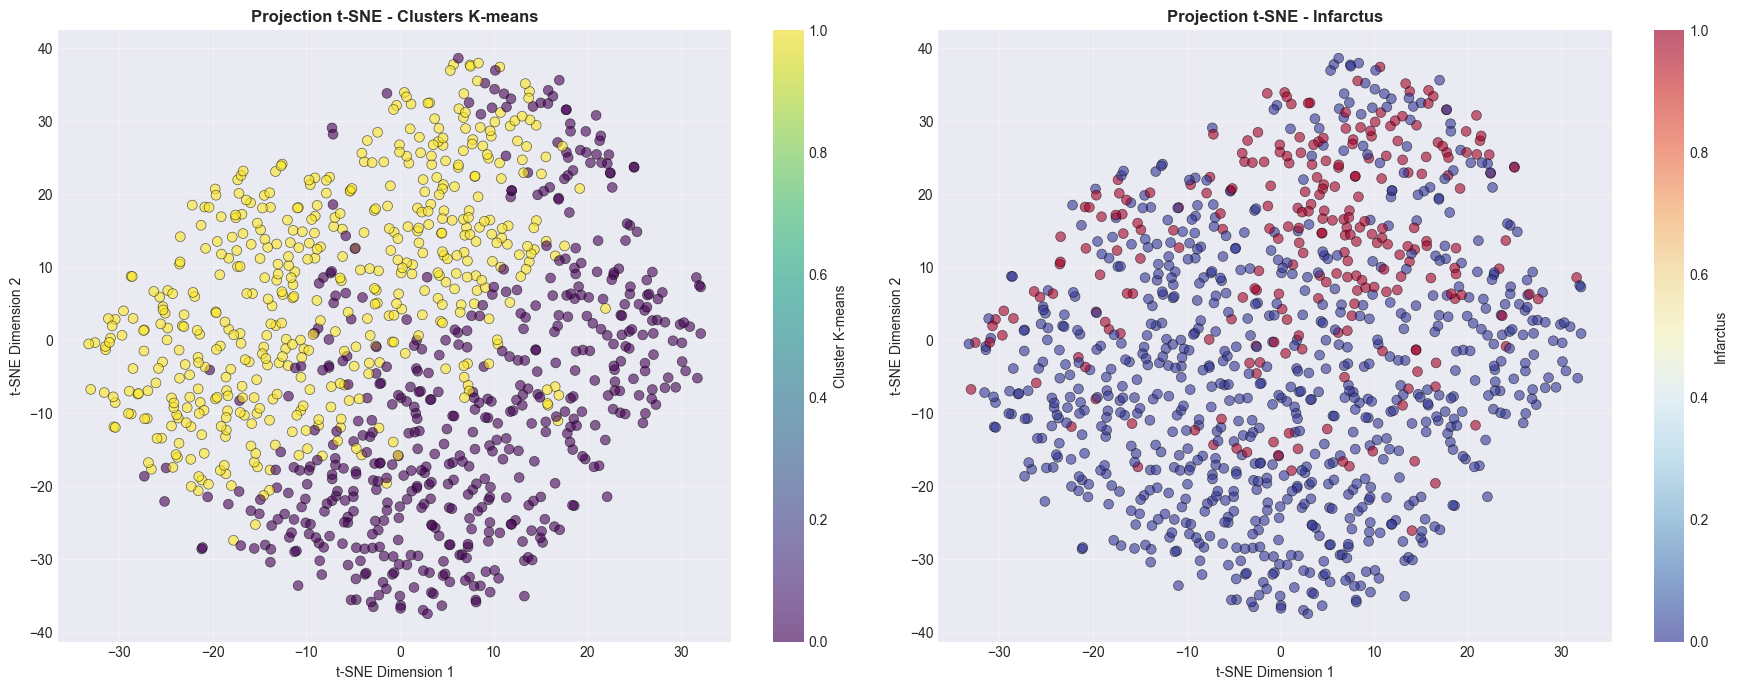

In [281]:
"""
16. t-SNE POUR VISUALISATION
"""
print("\n" + "=" * 80)
print("16. t-SNE POUR VISUALISATION")
print("=" * 80)

from sklearn.manifold import TSNE

# t-SNE
print("\nCalcul de la projection t-SNE (cela peut prendre un moment)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

print("Projection t-SNE calculee")

# Visualisation: t-SNE
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# t-SNE avec clusters K-means
scatter1 = axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_kmeans,
                           cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
axes[0].set_xlabel('t-SNE Dimension 1')
axes[0].set_ylabel('t-SNE Dimension 2')
axes[0].set_title('Projection t-SNE - Clusters K-means', fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Cluster K-means')
axes[0].grid(True, alpha=0.3)

# t-SNE avec variable cible ou clusters hierarchiques
if y is not None:
    scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='RdYlBu_r',
                               alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
    axes[1].set_xlabel('t-SNE Dimension 1')
    axes[1].set_ylabel('t-SNE Dimension 2')
    axes[1].set_title('Projection t-SNE - Infarctus', fontweight='bold')
    plt.colorbar(scatter2, ax=axes[1], label='Infarctus')
else:
    scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_hierarchical,
                               cmap='plasma', alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
    axes[1].set_xlabel('t-SNE Dimension 1')
    axes[1].set_ylabel('t-SNE Dimension 2')
    axes[1].set_title('Projection t-SNE - Clusters Hierarchiques', fontweight='bold')
    plt.colorbar(scatter2, ax=axes[1], label='Cluster Hierarchique')

axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(dir_non_supervise / 'tsne_visualisation.png', dpi=300, bbox_inches='tight')
plt.show()


In [282]:
"""
17. RESUME ET EXPORT DES RESULTATS
"""
print("\n" + "=" * 80)
print("17. RESUME ET EXPORT DES RESULTATS")
print("=" * 80)

# Creer un DataFrame avec tous les resultats
resultats = pd.DataFrame({
    'Patient_ID': range(len(X)),
    'Cluster_KMeans': clusters_kmeans,
    'Cluster_Hierarchical': clusters_hierarchical,
    'PC1': X_pca_2d[:, 0],
    'PC2': X_pca_2d[:, 1],
    'tSNE1': X_tsne[:, 0],
    'tSNE2': X_tsne[:, 1]
})

if y is not None:
    resultats['Infarctus'] = y.values

# Ajouter les variables originales
resultats = pd.concat([resultats, X_num.reset_index(drop=True)], axis=1)

# Sauvegarder
resultats.to_excel(dir_non_supervise / 'resultats_complets_analyse_exploratoire.xlsx', index=False)
print(f"\nResultats exportes dans: {dir_non_supervise / 'resultats_complets_analyse_exploratoire.xlsx'}")

# Resume final
print("\n" + "=" * 80)
print("RESUME DE L'ANALYSE EXPLORATOIRE")
print("=" * 80)

print(f"\nDataset: {X.shape[0]} patients, {X.shape[1]} variables")
print(f"\nTypes de variables:")
print(f"   - Variables binaires: {len(variables_binaires)}")
print(f"   - Variables categorielles: {len(variables_categorielles)}")
print(f"   - Variables numeriques: {len(variables_numeriques)}")

if y is not None:
    print(f"\nVariable cible (infarctus):")
    print(f"   - Taux d'infarctus: {y.mean()*100:.2f}%")
    print(f"   - Ratio de desequilibre: {y.value_counts().max() / y.value_counts().min():.2f}:1")

print(f"\nPCA:")
print(f"   - Variance expliquee (PC1+PC2): {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")
print(f"   - Composantes pour 90% variance: {n_comp_90}")

print(f"\nK-means Clustering:")
print(f"   - Nombre optimal de clusters: {k_optimal}")
print(f"   - Score de silhouette: {silhouette:.3f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin:.3f}")

print(f"\nClustering Hierarchique:")
print(f"   - Nombre de clusters: {k_optimal}")
print(f"   - Methode: Ward")

print(f"\nFichiers generes dans le dossier '{dir_non_supervise}':")
generated_files = list(output_dir.glob('*'))
for i, file in enumerate(sorted(generated_files), 1):
    print(f"   {i:2d}. {file.name}")

print("\n" + "=" * 80)
print("ANALYSE EXPLORATOIRE TERMINEE AVEC SUCCES")
print("=" * 80)



17. RESUME ET EXPORT DES RESULTATS

Resultats exportes dans: analyse_exploratoire\3_methodes_non_supervisees\resultats_complets_analyse_exploratoire.xlsx

RESUME DE L'ANALYSE EXPLORATOIRE

Dataset: 1000 patients, 20 variables

Types de variables:
   - Variables binaires: 8
   - Variables categorielles: 1
   - Variables numeriques: 11

Variable cible (infarctus):
   - Taux d'infarctus: 25.00%
   - Ratio de desequilibre: 3.00:1

PCA:
   - Variance expliquee (PC1+PC2): 30.75%
   - Composantes pour 90% variance: 9

K-means Clustering:
   - Nombre optimal de clusters: 2
   - Score de silhouette: 0.105
   - Davies-Bouldin Index: 2.740

Clustering Hierarchique:
   - Nombre de clusters: 2
   - Methode: Ward

Fichiers generes dans le dossier 'analyse_exploratoire\3_methodes_non_supervisees':
    1. 1_statistiques_descriptives
    2. 2_analyse_variable_cible
    3. 3_methodes_non_supervisees

ANALYSE EXPLORATOIRE TERMINEE AVEC SUCCES
